<a href="https://colab.research.google.com/github/Cyberszn/Deep-learning-assesment/blob/main/MLC_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **IMPORTING THE NECESSARY LIBRARIES AND DATASET**

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
sns.set(
    { "figure.figsize": (6, 4) },
    style='ticks',
    color_codes=True,
    font_scale=0.8
)
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,  DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, make_scorer

from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import sys
if 'google.colab' in sys.modules:
    !pip install -q dtreeviz
import dtreeviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 2.0 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
adverts = pd.read_csv('/content/drive/MyDrive/adverts.csv')

In [ ]:
adverts.head(10)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel
5,202009304412074,16000.0,17,Blue,Audi,S5,USED,2017.0,29000,Convertible,False,Petrol
6,202007080998445,24075.0,17,Red,Vauxhall,Viva,USED,2017.0,5861,Hatchback,False,Petrol
7,202009244143980,99000.0,13,Bronze,Land Rover,Range Rover,USED,2013.0,24475,SUV,False,Diesel
8,202010014442611,111236.0,08,Black,Mercedes-Benz,S Class,USED,2008.0,6995,Limousine,False,Diesel
9,202006230431327,9500.0,19,White,Land Rover,Range Rover,USED,2019.0,79995,SUV,False,Diesel


## **Meaning and Type of Features; Analysis of Distributions**

A car body type is the categorisation of vehicles based on their design, shape, size and the kind of space it has inside of it.

In [ ]:
adverts['body_type'].head(6)

0            SUV
1         Saloon
2            SUV
3      Hatchback
4            SUV
5    Convertible
Name: body_type, dtype: object

Year of registration is also an important factor in determining prices of car, a recent year would have a higher price compared to an old year.

In [ ]:
adverts['year_of_registration'].head(7)

0       NaN
1    2011.0
2    2017.0
3    2016.0
4    2015.0
5    2017.0
6    2017.0
Name: year_of_registration, dtype: float64

The make of a car is also a great factor in influencing car price, known car brands would first get attention or get an offer first before other brands.

In [ ]:
adverts['standard_make'].value_counts()

BMW               37376
Audi              35280
Volkswagen        34246
Vauxhall          33700
Mercedes-Benz     31917
                  ...  
Bristol               1
Wolseley              1
Pagani                1
International         1
Custom Vehicle        1
Name: standard_make, Length: 110, dtype: int64

A car mileage is the number of kilometers the car was driven for since it was manufactured or the total distance it has travelled since production.

In [ ]:
adverts['mileage'].head(7)

0         0.0
1    108230.0
2      7800.0
3     45000.0
4     64000.0
5     16000.0
6     24075.0
Name: mileage, dtype: float64

## **Analysis of Predictive Power of Features**

Analysis of predictive power of mileage

<Axes: xlabel='mileage', ylabel='price'>

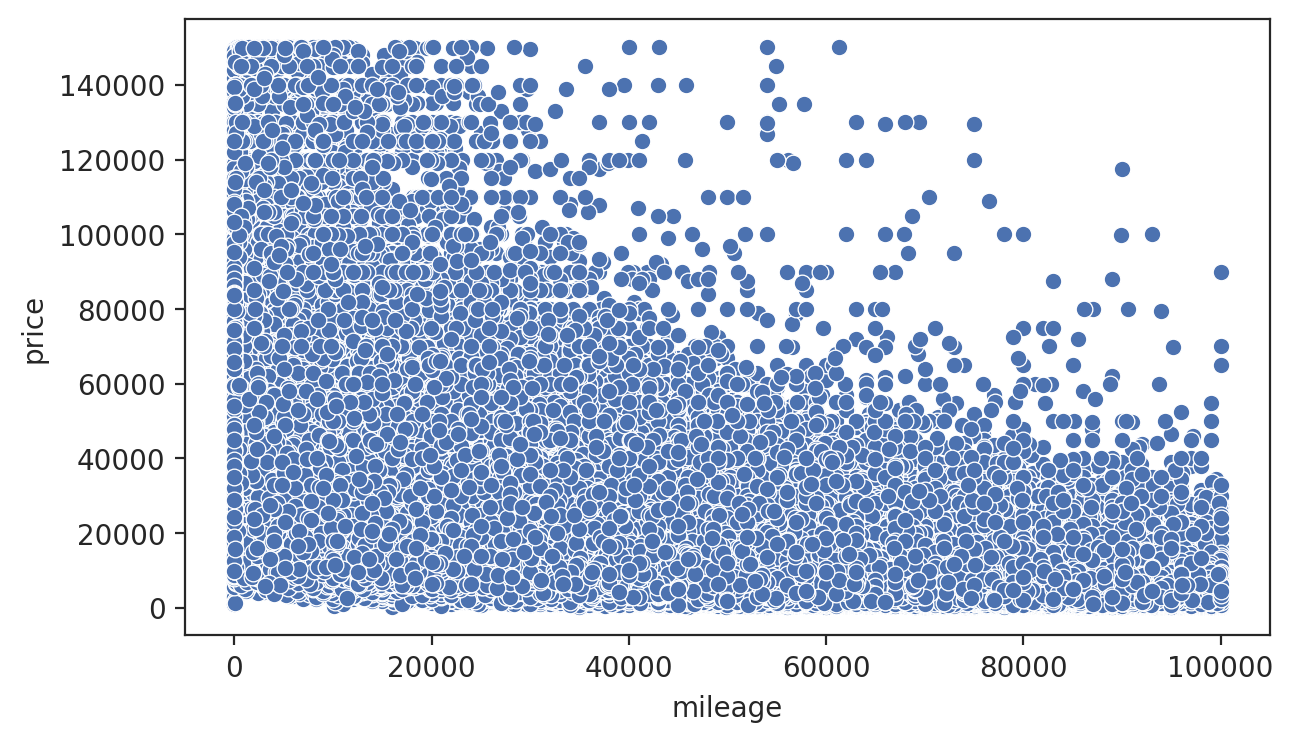

In [ ]:
mile_ad = adverts[(adverts['mileage'] <= 100000) & (adverts['price'] <= 150000)]
plt.figure(figsize=(7, 4))
y = adverts[['mileage']]
x = adverts['price']
sns.scatterplot(x='mileage', y='price', data=mile_ad)

<Figure size 1000x800 with 0 Axes>

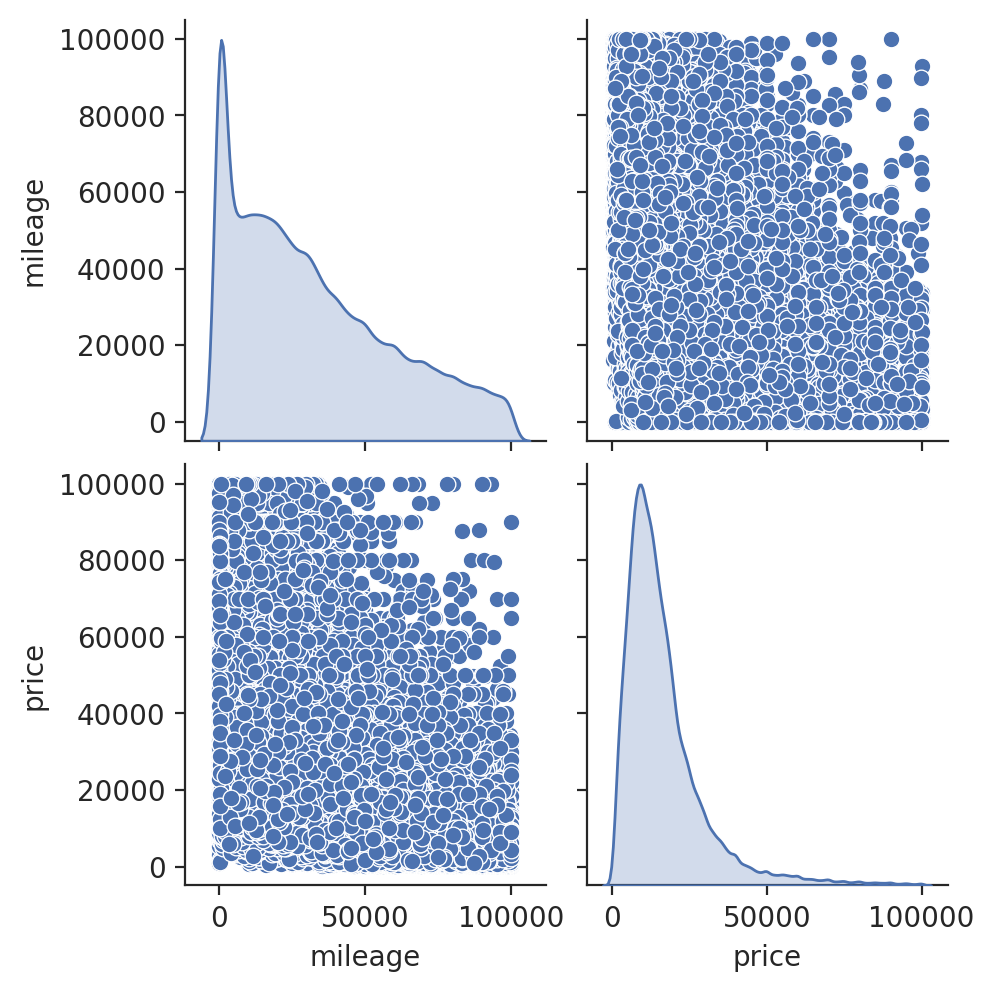

In [ ]:
mile_ad = adverts[(adverts['mileage'] <= 100000) & (adverts['price'] <= 100000)]
plt.figure(figsize=(10, 8))
sns.pairplot(mile_ad[['mileage', 'price']], markers='o', diag_kind='kde')

Analysis of predictive power of year_of_registration

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, '2000.0'),
  Text(1, 0, '2001.0'),
  Text(2, 0, '2002.0'),
  Text(3, 0, '2003.0'),
  Text(4, 0, '2004.0'),
  Text(5, 0, '2005.0'),
  Text(6, 0, '2006.0'),
  Text(7, 0, '2007.0'),
  Text(8, 0, '2008.0'),
  Text(9, 0, '2009.0'),
  Text(10, 0, '2010.0'),
  Text(11, 0, '2011.0'),
  Text(12, 0, '2012.0'),
  Text(13, 0, '2013.0'),
  Text(14, 0, '2014.0'),
  Text(15, 0, '2015.0'),
  Text(16, 0, '2016.0'),
  Text(17, 0, '2017.0'),
  Text(18, 0, '2018.0'),
  Text(19, 0, '2019.0'),
  Text(20, 0, '2020.0')])

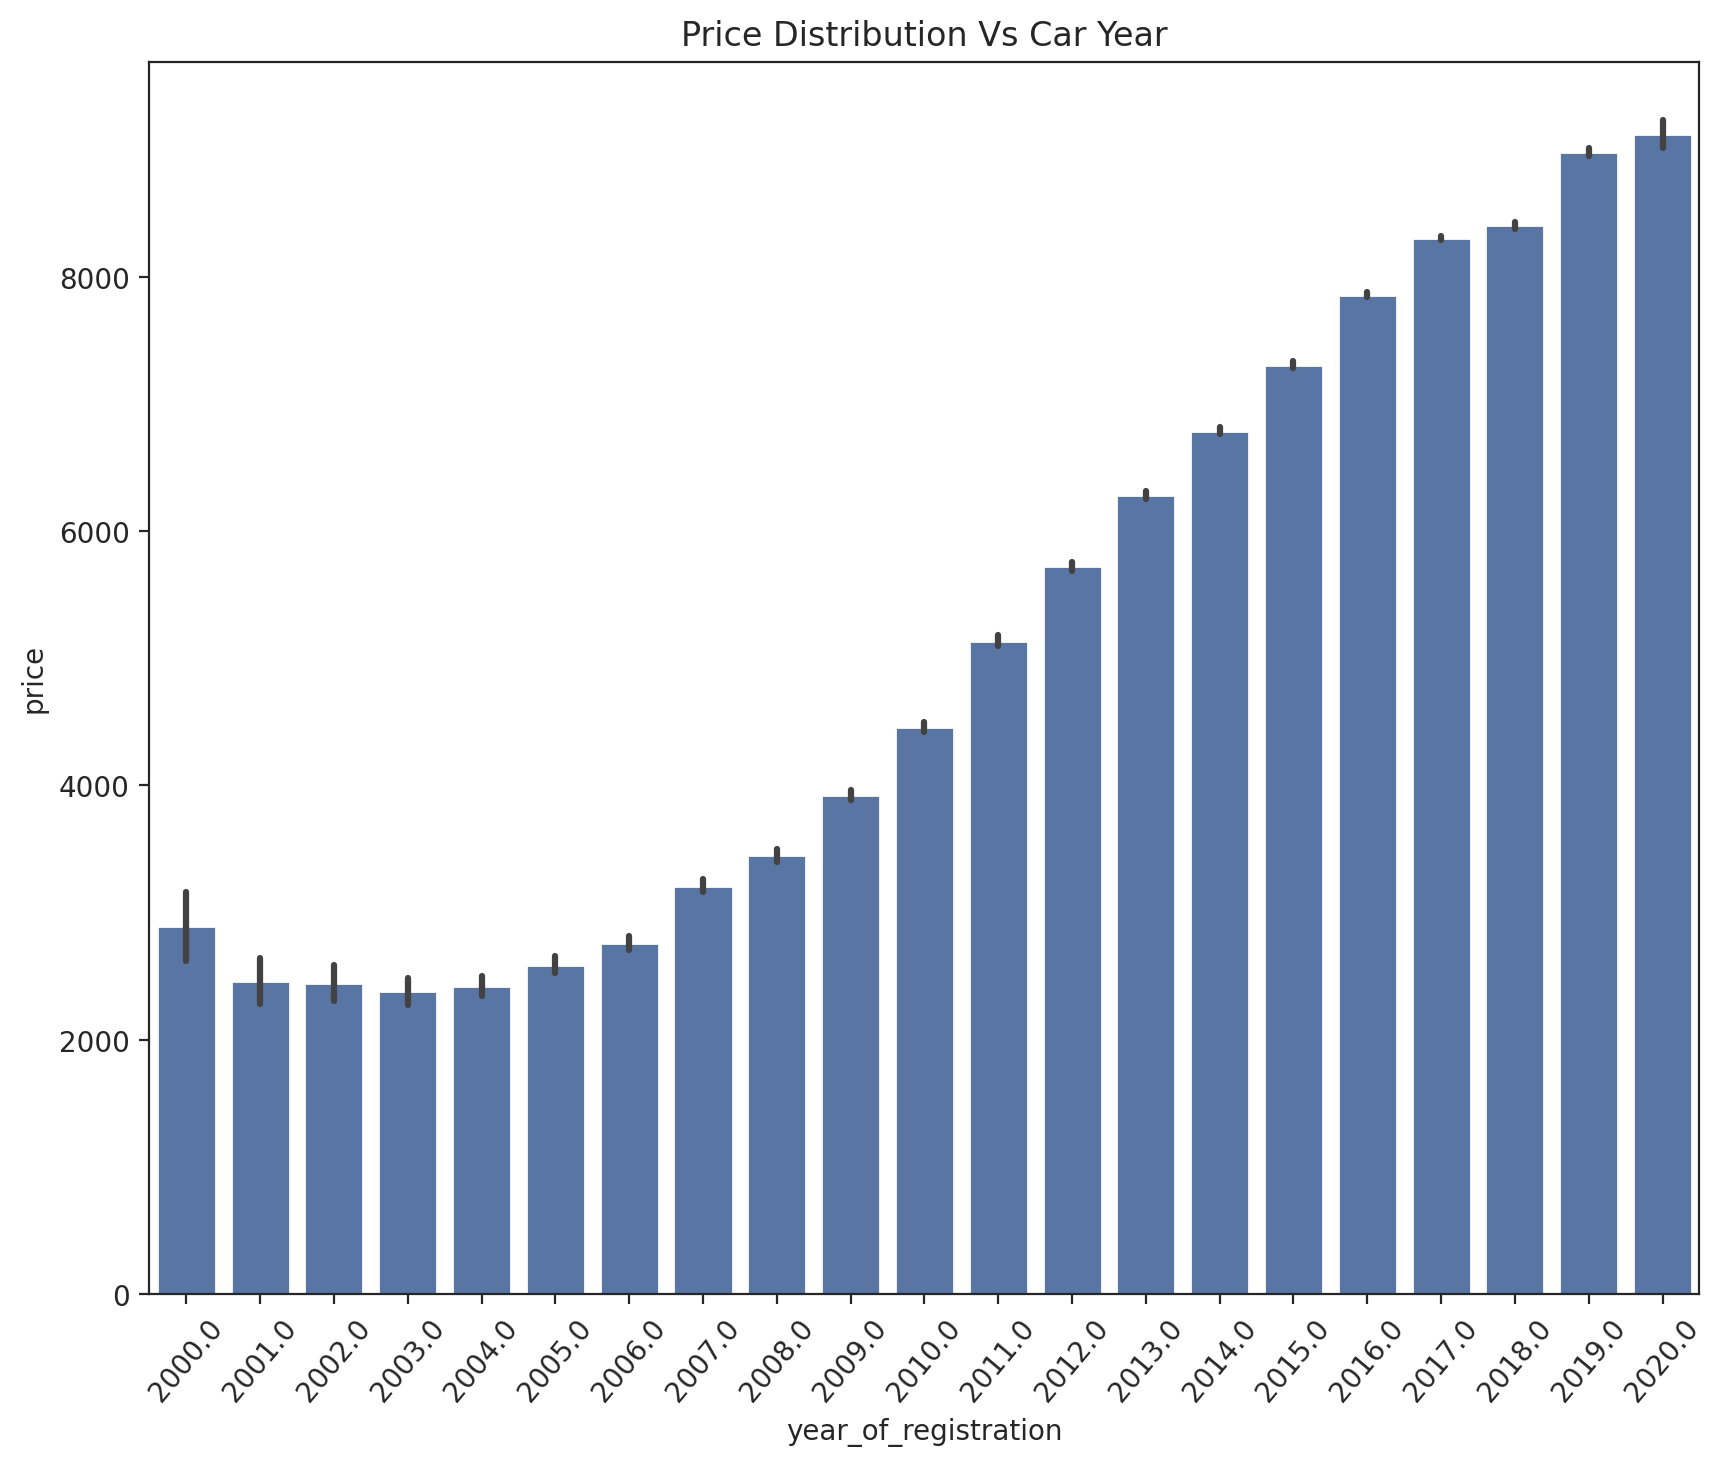

In [ ]:
mile_ad1 = adverts[(adverts['year_of_registration'] >= 2000) & (adverts['price'] <= 10000)]
plt.figure(figsize=(10,8))
sns.barplot(x='year_of_registration', y='price', data=mile_ad1)
plt.title('Price Distribution Vs Car Year')
plt.xticks(rotation=50)

Analysis of predictive power of BodyType

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'SUV'),
  Text(1, 0, 'Saloon'),
  Text(2, 0, 'Hatchback'),
  Text(3, 0, 'Convertible'),
  Text(4, 0, 'Limousine'),
  Text(5, 0, 'Estate'),
  Text(6, 0, 'MPV'),
  Text(7, 0, 'Coupe'),
  Text(8, 0, 'Pickup'),
  Text(9, 0, 'Combi Van'),
  Text(10, 0, 'Panel Van'),
  Text(11, 0, 'Minibus'),
  Text(12, 0, 'Window Van'),
  Text(13, 0, 'Camper'),
  Text(14, 0, 'Car Derived Van'),
  Text(15, 0, 'Chassis Cab')])

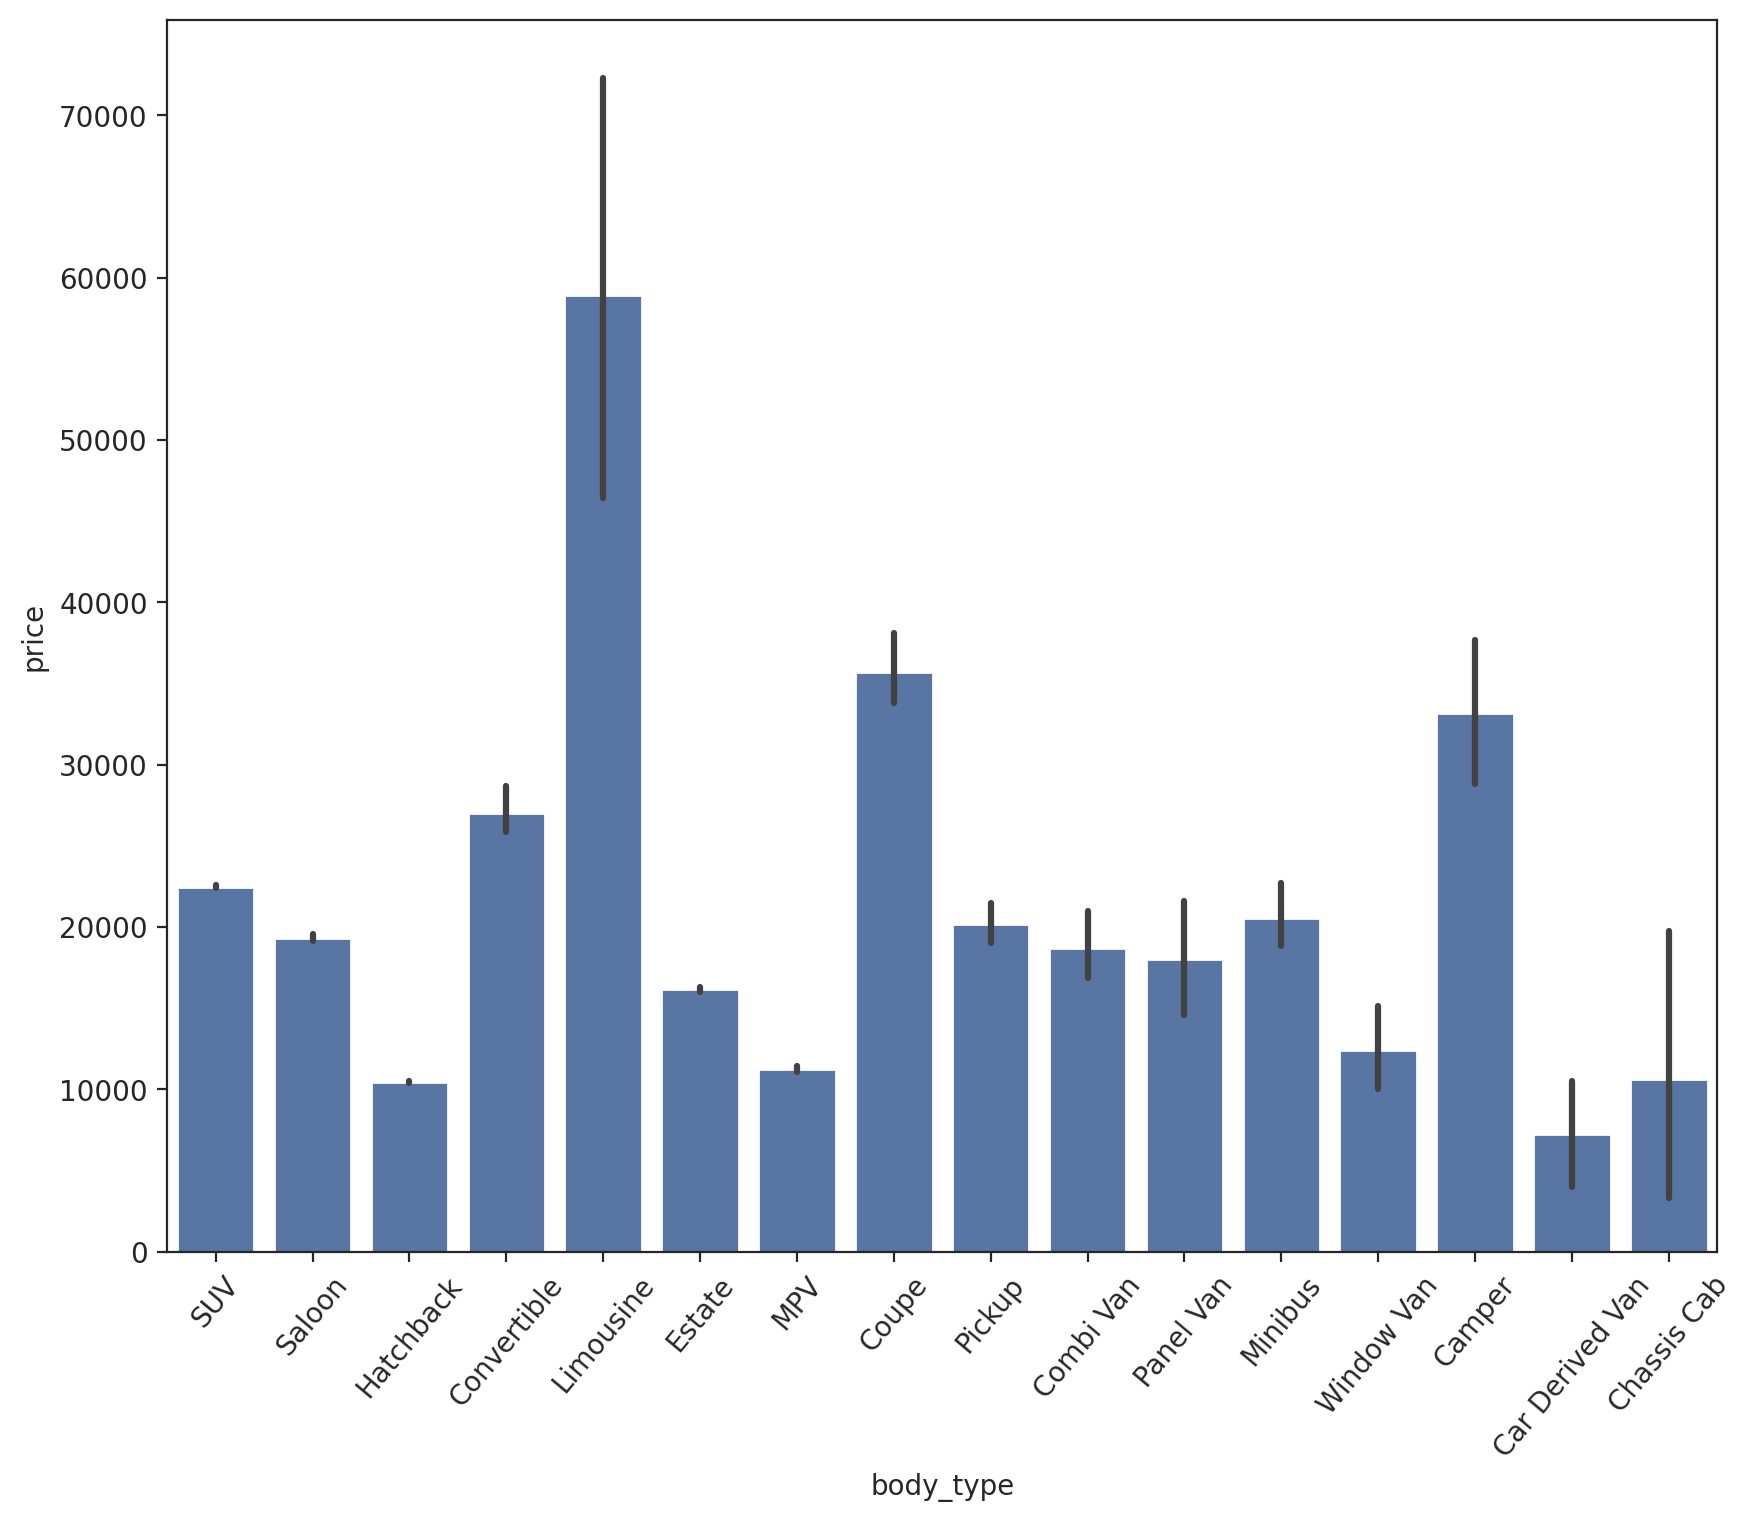

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x='body_type', y='price', data=adverts)
plt.xticks(rotation=50)

## **Data Processing for Data Exploration and Visualisation**

Data preprocessing simply mean preparing the data for exploration and proper visualization. For example if we visualize year of registration, we can find some irregular patterns in the chart.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83],
 [Text(0, 0, '999.0'),
  Text(1, 0, '1006.0'),
  Text(2, 0, '1007.0'),
  Text(3, 0, '1008.0'),
  Text(4, 0, '1009.0'),
  Text(5, 0, '1010.0'),
  Text(6, 0, '1015.0'),
  Text(7, 0, '1016.0'),
  Text(8, 0, '1017.0'),
  Text(9, 0, '1018.0'),
  Text(10, 0, '1063.0'),
  Text(11, 0, '1515.0'),
  Text(12, 0, '1909.0'),
  Text(13, 0, '1933.0'),
  Text(14, 0, '1934.0'),
  Text(15, 0, '1950.0'),
  Text(16, 0, '1952.0'),
  Text(17, 0, '1954.0'),
  Text(18, 0, '1955.0'),
  Text(19, 0, '1956.0'),
  Text(20, 0, '1

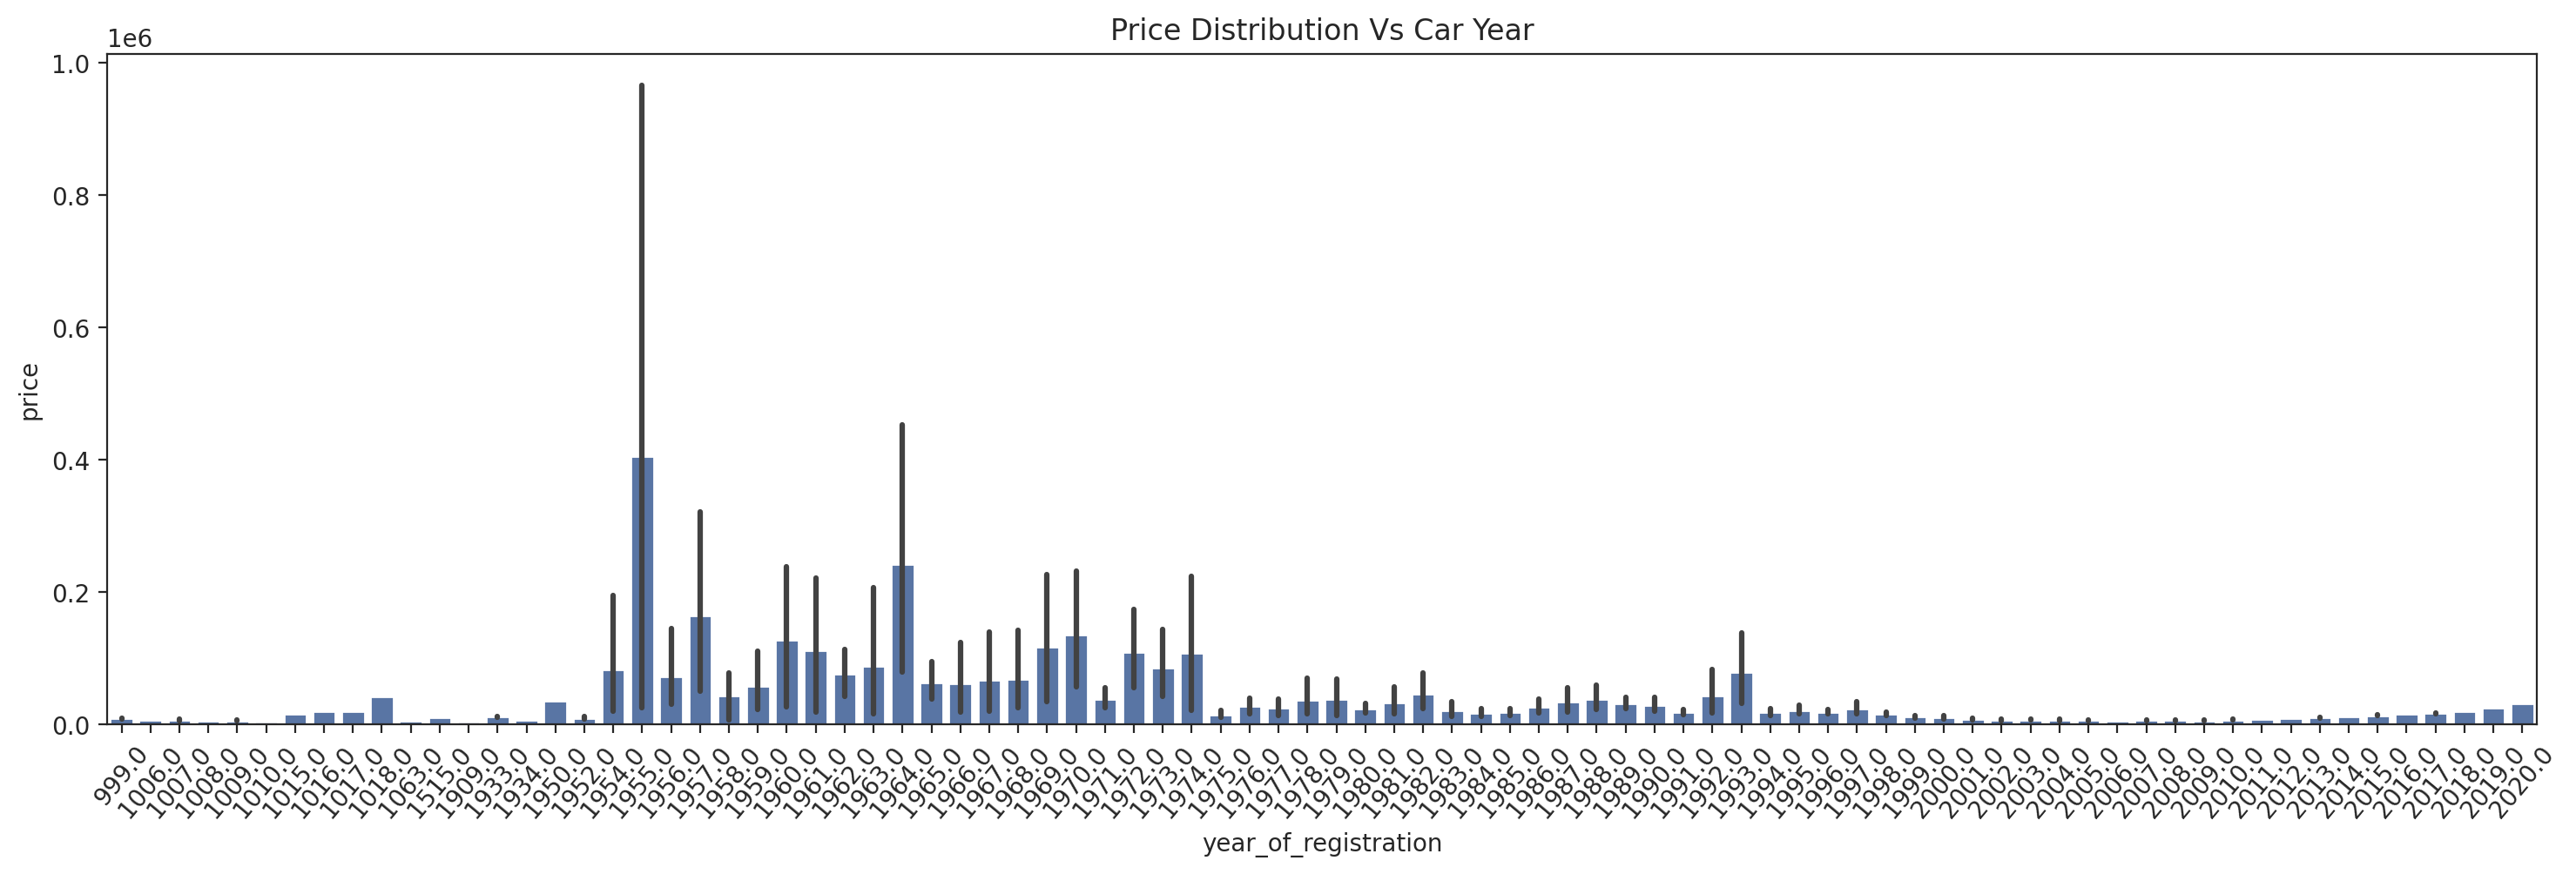

In [ ]:
plt.figure(figsize=(18,5))
sns.barplot(x='year_of_registration', y='price', data=adverts)
plt.title('Price Distribution Vs Car Year')
plt.xticks(rotation=50)

From the chart we can see so many irregularities in the data, hence the need for data cleaning.

Also, for mileage there are several irregular values

Text(0.5, 0, 'Mileage')

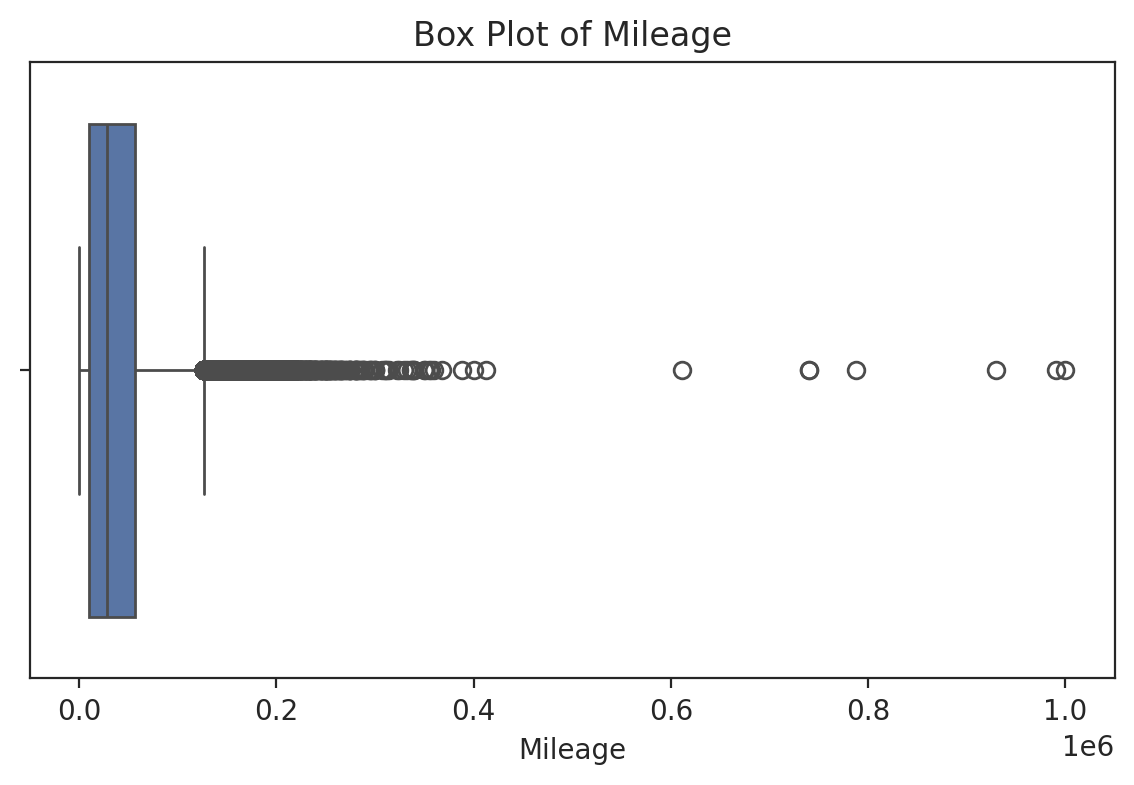

In [ ]:
plt.figure(figsize=(7, 4))
sns.boxplot(x=adverts['mileage'])
plt.title('Box Plot of Mileage')
plt.xlabel('Mileage')

Text(0.5, 0, 'Price')

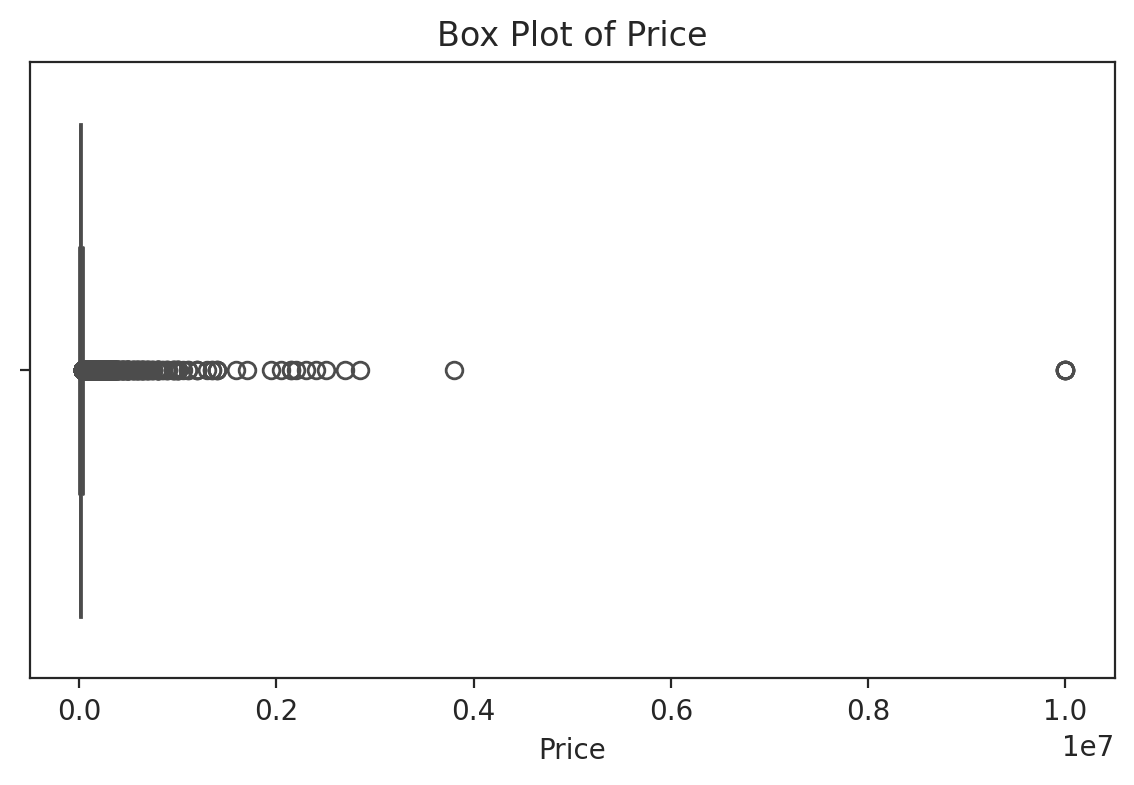

In [ ]:
plt.figure(figsize=(7, 4))
sns.boxplot(x=adverts['price'])
plt.title('Box Plot of Price')
plt.xlabel('Price')

##**Dealing with Missing Values, Outliers and Noise**

Dealing with missing values: viewing all missing values.

In [ ]:
adverts.isnull().sum()

public_reference             0
mileage                    127
reg_code                 31857
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33311
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64

I queried the dataset for the latest year, using adverts.[year_of_registrationmode].max it shows the modal year as 2020. so I decided to fill the missing values with 2021

In [ ]:
adverts["year_of_registration"].max()

2020.0

In [ ]:
(
    adverts
    .query("year_of_registration==2021")
    .sort_values('price', ascending=False)
    .head(5)
)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type


In [ ]:
new_ads = adverts

In [ ]:
#Converting the values on the reg_code column to numeric
new_ads['reg_code'] = pd.to_numeric(new_ads['reg_code'], errors= 'coerce')
#Getting all the rows where vehicle condition column = NEW
new_ads.loc[(new_ads['vehicle_condition'] == 'NEW' ) &
            (new_ads['reg_code'].isnull()), 'reg_code'] = 21
new_ads['year_of_registration'] = pd.to_numeric(new_ads['year_of_registration'], errors= 'coerce')
new_ads.loc[(new_ads['vehicle_condition'] == 'NEW' ) &
            (new_ads['year_of_registration'].isnull()), 'year_of_registration'] = 2021.0

In [ ]:
new_ads.head(10)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,21.0,Grey,Volvo,XC90,NEW,2021.0,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61.0,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17.0,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16.0,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64.0,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel
5,202009304412074,16000.0,17.0,Blue,Audi,S5,USED,2017.0,29000,Convertible,False,Petrol
6,202007080998445,24075.0,17.0,Red,Vauxhall,Viva,USED,2017.0,5861,Hatchback,False,Petrol
7,202009244143980,99000.0,13.0,Bronze,Land Rover,Range Rover,USED,2013.0,24475,SUV,False,Diesel
8,202010014442611,111236.0,8.0,Black,Mercedes-Benz,S Class,USED,2008.0,6995,Limousine,False,Diesel
9,202006230431327,9500.0,19.0,White,Land Rover,Range Rover,USED,2019.0,79995,SUV,False,Diesel


In [ ]:
new_ads.isnull().sum()

public_reference            0
mileage                   127
reg_code                 3523
standard_colour          5378
standard_make               0
standard_model              0
vehicle_condition           0
year_of_registration     2062
price                       0
body_type                 837
crossover_car_and_van       0
fuel_type                 601
dtype: int64

I reduced the missing values to a minimum, then i will drop all missing values.

In [ ]:
new_ads0 = new_ads.dropna()

In [ ]:
new_ads0.isnull().sum()

public_reference         0
mileage                  0
reg_code                 0
standard_colour          0
standard_make            0
standard_model           0
vehicle_condition        0
year_of_registration     0
price                    0
body_type                0
crossover_car_and_van    0
fuel_type                0
dtype: int64

Dealing with Outliers for Price and Mileage

In [ ]:
#FOR PRICE WE HAVE
Price1 = new_ads0['price'].quantile(0.25)
Price2 = new_ads0['price'].quantile(0.75)

In [ ]:
#interquantile range
IQR = Price1 - Price2

In [ ]:
low_brac = Price1 - 1.5 * IQR
high_brac = Price2 + 1.5 * IQR

In [ ]:
outliers = new_ads0[(new_ads0['price']<low_brac) | (new_ads0['price']>high_brac)]

In [ ]:
outliers_mask = (new_ads0['price'] < low_brac) | (new_ads0['price'] > high_brac)

In [ ]:
no_outliers = new_ads0[~outliers_mask]

In [ ]:
new_ads0.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,21.0,Grey,Volvo,XC90,NEW,2021.0,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61.0,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17.0,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16.0,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64.0,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [ ]:
#FOR MILEAGE WE HAVE
Mil1 = new_ads0['mileage'].quantile(0.25)
Mil2 = new_ads0['mileage'].quantile(0.75)

In [ ]:
#interquantile range
IQR1 = Mil1 - Mil2

In [ ]:
low_brac1 = Price1 - 1.5 * IQR1
high_brac1 = Price2 + 1.5 * IQR1

In [ ]:
outliers1 = new_ads0[(new_ads0['mileage']<low_brac1) | (new_ads0['mileage']>high_brac1)]

In [ ]:
outliers_mask1 = (new_ads0['mileage'] < low_brac1) | (new_ads0['mileage'] > high_brac1)

In [ ]:
no_outliers1 = new_ads0[~outliers_mask1]

In [ ]:
new_ads0.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,21.0,Grey,Volvo,XC90,NEW,2021.0,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61.0,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17.0,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16.0,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64.0,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [ ]:
new_ads0.head(1)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,21.0,Grey,Volvo,XC90,NEW,2021.0,73970,SUV,False,Petrol Plug-in Hybrid


 ## ***Feature Engineering, Data Transformations, Feature Selection***

I am going to be dropping columns like Standard_colour, Reg_code, Public_reference, Crossover_car_and_van, Fuel_type, Standard_model because they have no direct influence on price.

In [ ]:
dropcolumn= ['standard_colour', 'reg_code', 'public_reference', 'crossover_car_and_van', 'fuel_type', 'standard_model']

In [ ]:
new_ads1 = new_ads0.drop(columns=dropcolumn )
new_ads1

,mileage,standard_make,vehicle_condition,year_of_registration,price,body_type
0,0.0,Volvo,NEW,2021.0,73970,SUV
1,108230.0,Jaguar,USED,2011.0,7000,Saloon
2,7800.0,SKODA,USED,2017.0,14000,SUV
3,45000.0,Vauxhall,USED,2016.0,7995,Hatchback
4,64000.0,Land Rover,USED,2015.0,26995,SUV
...,...,...,...,...,...,...
402000,5179.0,Peugeot,USED,2019.0,10595,Hatchback
402001,110000.0,Peugeot,USED,2009.0,2000,Hatchback
402002,52760.0,Nissan,USED,2012.0,7250,SUV
402003,10250.0,Abarth,USED,2015.0,11490,Hatchback


In [ ]:
new_ads1.isnull().sum()

mileage                 0
standard_make           0
vehicle_condition       0
year_of_registration    0
price                   0
body_type               0
dtype: int64

Creating A New Feature called the Car_year, we use 2021 as the current year.

In [ ]:
Recent_yr = 2021
new_ads1['car_year'] = Recent_yr - new_ads1['year_of_registration']
new_ads1['car_year']
new_ads1.head(10)

,mileage,standard_make,vehicle_condition,year_of_registration,price,body_type,car_year
0,0.0,Volvo,NEW,2021.0,73970,SUV,0.0
1,108230.0,Jaguar,USED,2011.0,7000,Saloon,10.0
2,7800.0,SKODA,USED,2017.0,14000,SUV,4.0
3,45000.0,Vauxhall,USED,2016.0,7995,Hatchback,5.0
4,64000.0,Land Rover,USED,2015.0,26995,SUV,6.0
5,16000.0,Audi,USED,2017.0,29000,Convertible,4.0
6,24075.0,Vauxhall,USED,2017.0,5861,Hatchback,4.0
7,99000.0,Land Rover,USED,2013.0,24475,SUV,8.0
8,111236.0,Mercedes-Benz,USED,2008.0,6995,Limousine,13.0
9,9500.0,Land Rover,USED,2019.0,79995,SUV,2.0


**Categorical Encoding**

In [ ]:
Onehot = pd.get_dummies(new_ads1, columns=['body_type', 'vehicle_condition', 'standard_make'])
Onehot

,mileage,year_of_registration,price,car_year,body_type_Camper,body_type_Car Derived Van,body_type_Chassis Cab,body_type_Combi Van,body_type_Convertible,body_type_Coupe,...,standard_make_TVR,standard_make_Tesla,standard_make_Toyota,standard_make_Triumph,standard_make_Ultima,standard_make_Vauxhall,standard_make_Volkswagen,standard_make_Volvo,standard_make_Westfield,standard_make_Zenos
0,0.0,2021.0,73970,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,108230.0,2011.0,7000,10.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7800.0,2017.0,14000,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,45000.0,2016.0,7995,5.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,64000.0,2015.0,26995,6.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402000,5179.0,2019.0,10595,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
402001,110000.0,2009.0,2000,12.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
402002,52760.0,2012.0,7250,9.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
402003,10250.0,2015.0,11490,6.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Data Transformations**
- This is simply transforming the data so it becomes easier to work with and make decisions from it.
- I will use a method called "Logarithmic transformation".

((array([-4.63629512, -4.44942663, -4.34817734, ...,  4.34817734,
          4.44942663,  4.63629512]),
  array([    180,     200,     200, ..., 2299950, 2500000, 2850000])),
 (14247.253419423794, 16853.063156144053, 0.6542414973564322))

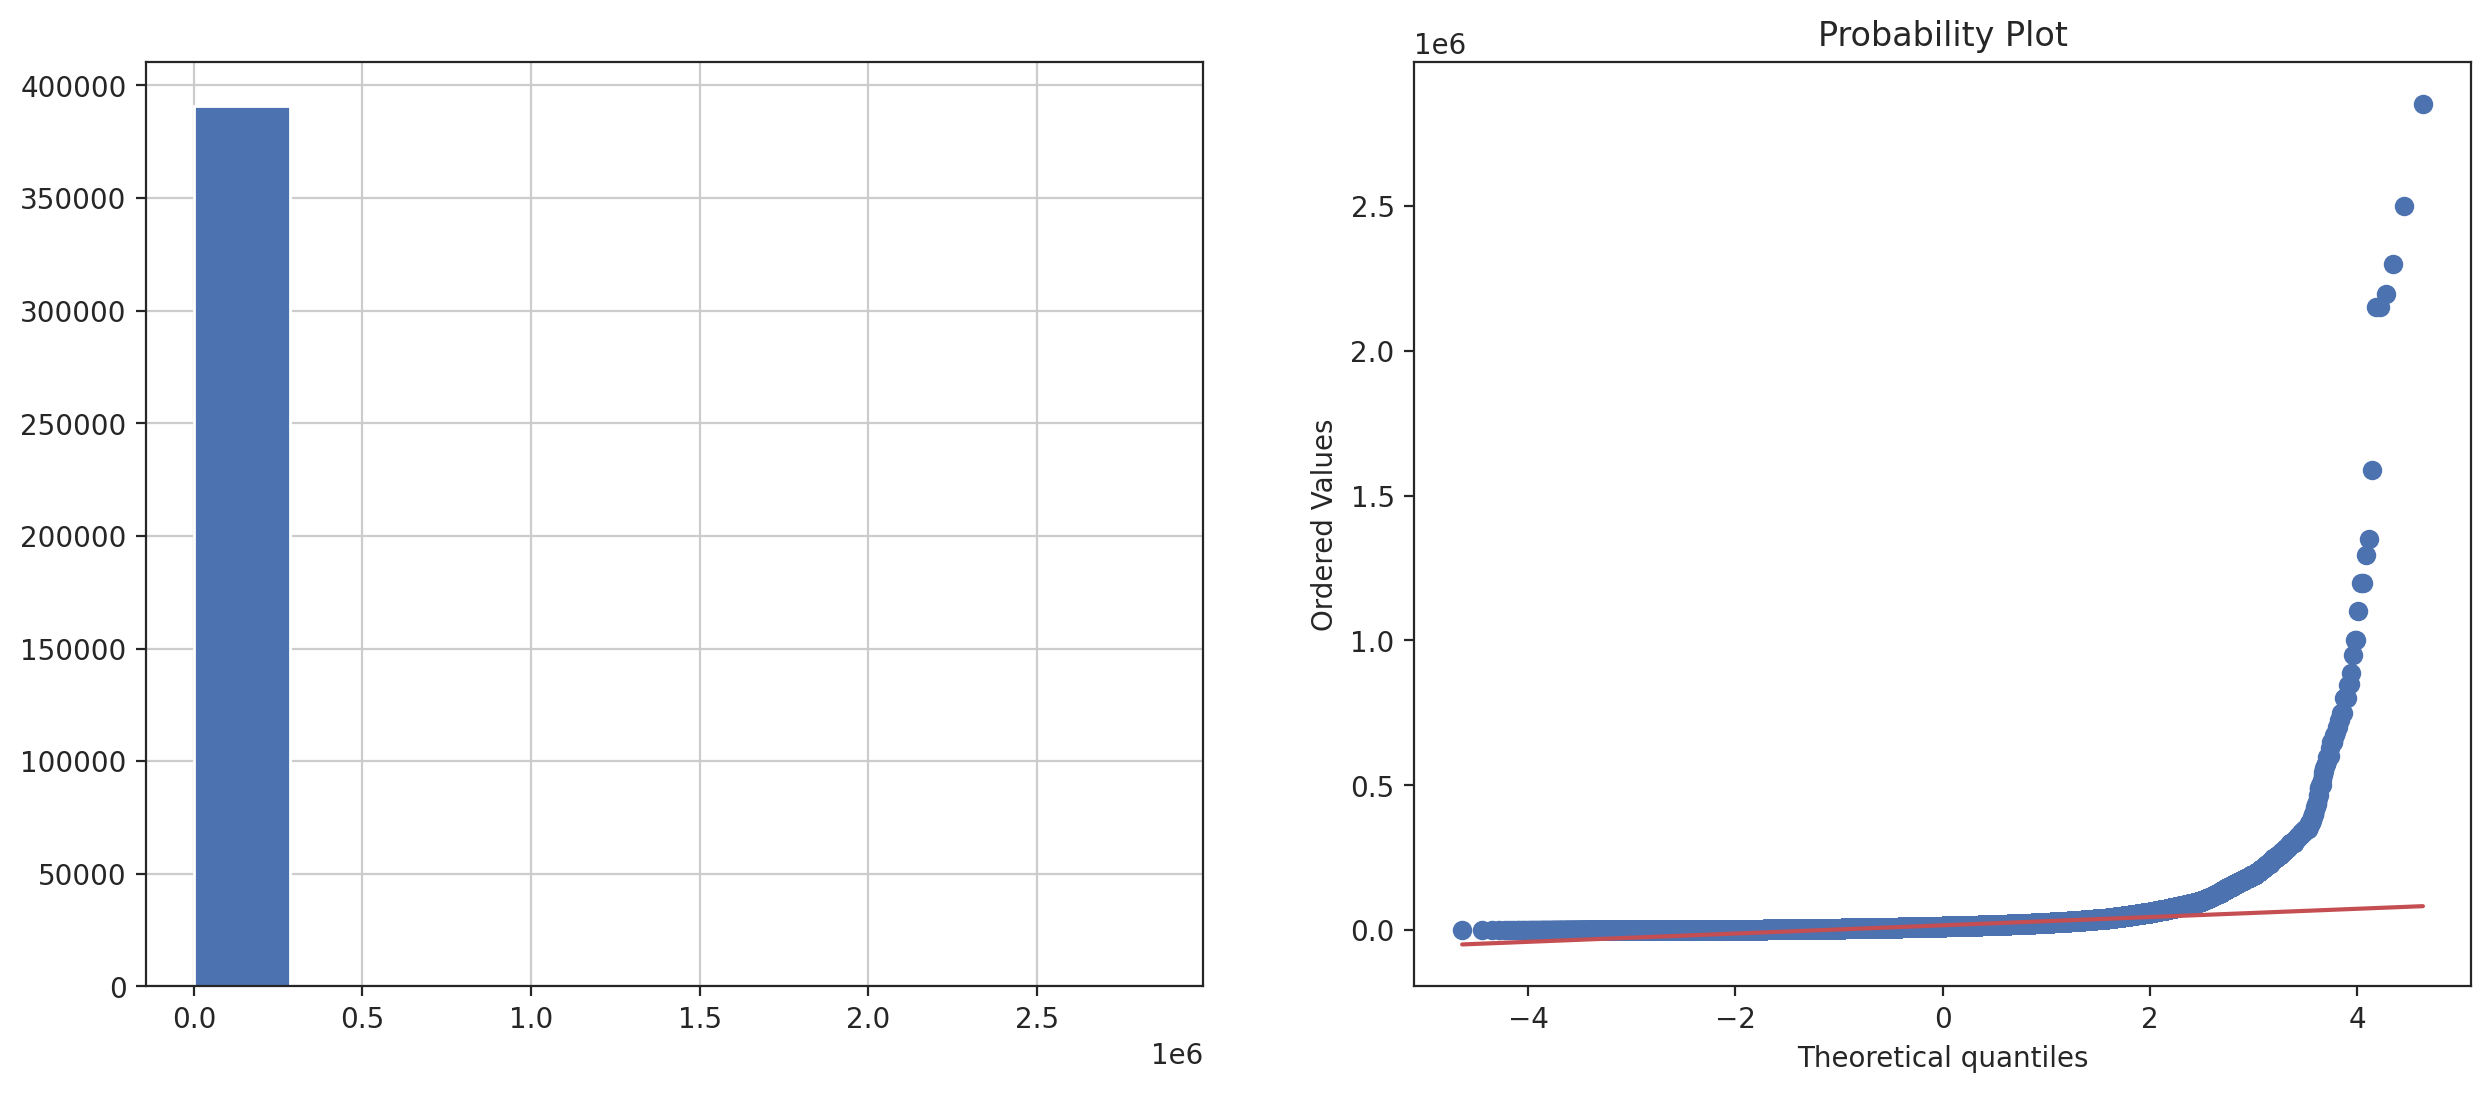

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
new_ads1['price'].hist()

plt.subplot(1, 2, 2)
stats.probplot(new_ads1['price'], dist='norm', plot=plt)

From the chart we can see that the price is not evenly distributed and not spread out, so I will use the logarithmic transformation.

In [ ]:
new_ads1['log_price']=np.log(new_ads1['price']+1)

((array([-4.63629512, -4.44942663, -4.34817734, ...,  4.34817734,
          4.44942663,  4.63629512]),
  array([ 5.19849703,  5.30330491,  5.30330491, ..., 14.64839838,
         14.73180169, 14.8628299 ])),
 (0.8370605603855085, 9.3860797089593, 0.993006290742995))

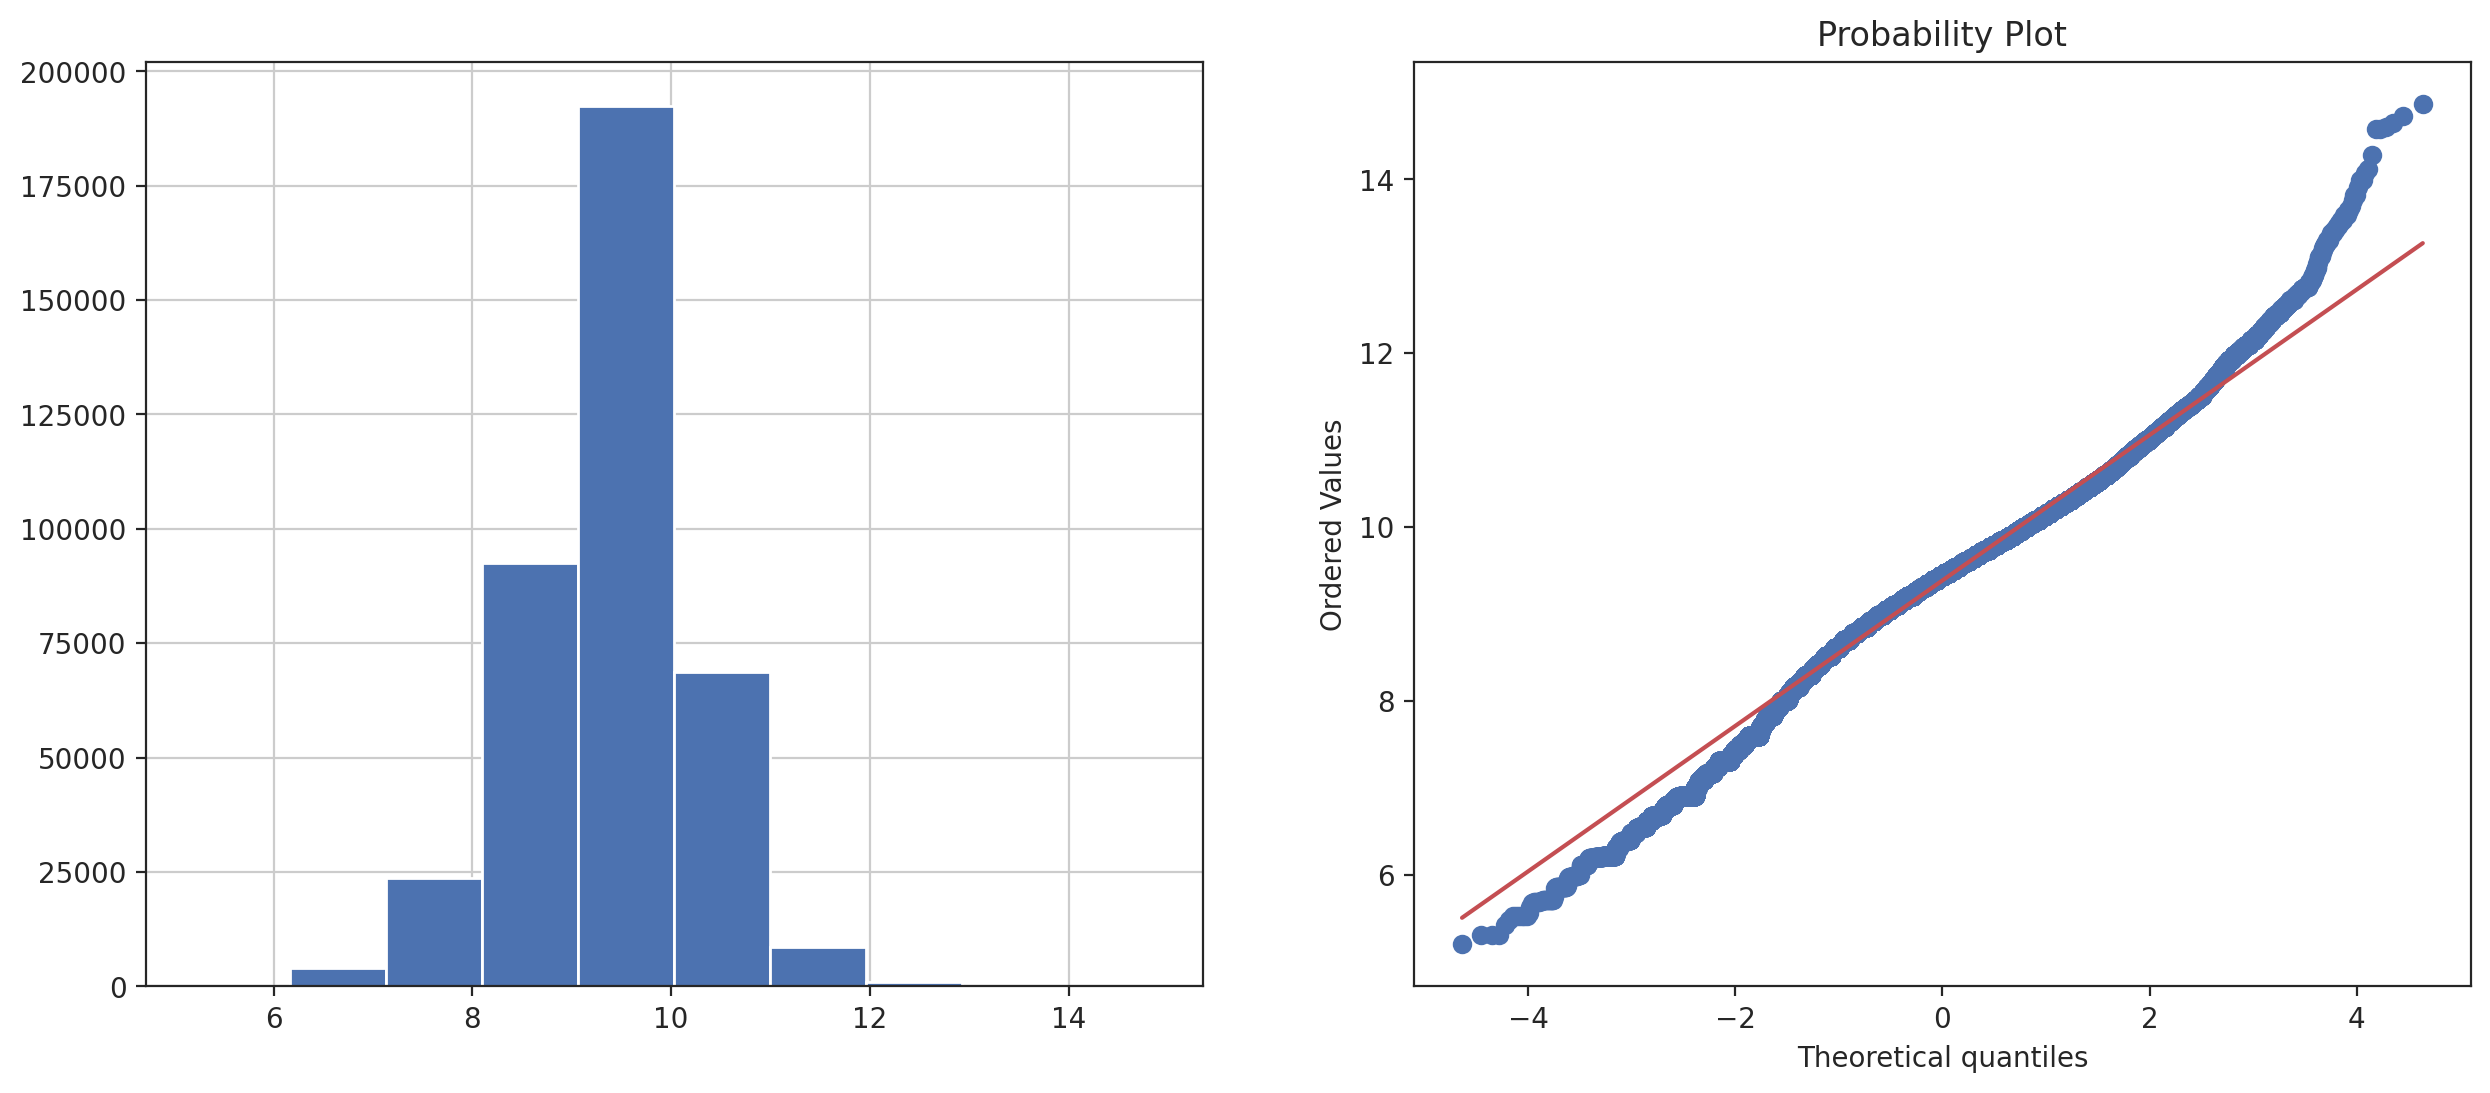

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
new_ads1['log_price'].hist()
plt.subplot(1,2,2)
stats.probplot(new_ads1['log_price'], dist='norm',plot=plt)

In [ ]:
Onehot.head()

,mileage,year_of_registration,price,car_year,body_type_Camper,body_type_Car Derived Van,body_type_Chassis Cab,body_type_Combi Van,body_type_Convertible,body_type_Coupe,...,standard_make_TVR,standard_make_Tesla,standard_make_Toyota,standard_make_Triumph,standard_make_Ultima,standard_make_Vauxhall,standard_make_Volkswagen,standard_make_Volvo,standard_make_Westfield,standard_make_Zenos
0,0.0,2021.0,73970,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,108230.0,2011.0,7000,10.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7800.0,2017.0,14000,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,45000.0,2016.0,7995,5.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,64000.0,2015.0,26995,6.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##**Algorithm Selection, Model Instantiation and Configuration**

**Algorithm Selection**
- Knn Regression
- Decision Tree
- Linear Regression

Linear regression is an algorithm that show linear relationship between a dependent variable and an independent variable to predict future outcomes. It will be used to predict continous outcome like price and other independent features
- Linear regression is more interpretable for continuous prediction feature like 'price'.
- Also the relationship between features and price is linear.

*Knn Regression algorithm uses ‘feature similarity’ to predict the values of any new data points. This means that the new point is assigned a value based on how closely (nearest neighbour) it resembles the points in the training set.
A kNN classifier takes the majority class of the neighbours as a prediction. a kNN regressor produces the average value (e.g., mean) of the target from the neighbours*
- Can be used to understand how features influence price
- It is efficient for large data set

Decision Tree are non parametric surpervised learning methods unlike KNN, it predicts by simple decision rules inferred from the data features. decision trees don't assume any underlying data distribution, making them adaptable to diverse data.
- It has visualization and is easy to understand and interprete.
- It is able to handle both numerical and Categorical data and multi-output problems.

**Model Instantiation and Configuration**
- Splitting my data into training and testing parts.
- I will use 20% to train and 80% to test.

### The X/y Split

In [ ]:
X = Onehot.drop('price', axis=1)
y = Onehot['price']

### The Train/Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((312660, 111), (78165, 111))

In [ ]:
`

((312660,), (78165,))

### Decision Tree

In [ ]:
dtr = DecisionTreeRegressor(max_depth=2)

In [ ]:
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

In [ ]:
dtr_pred = dtr.predict(X_test)

MAE, MSE and R2

In [ ]:
dtr_mae = mean_absolute_error(y_test,dtr_pred)
dtr_mae

8183.483002056831

In [ ]:
dtr_mse = mean_squared_error(y_test,dtr_pred)
dtr_mse

574644776.5867763

In [ ]:
dtr_r2 = r2_score(y_test,dtr_pred)
dtr_r2

0.15798220682385422

### Linear Regression

In [ ]:
lr1d = LinearRegression()

In [ ]:
lr1d.fit(X_train, y_train)

LinearRegression()

In [ ]:
lr1d_pred = lr1d.predict(X_test)

MAE, MSE and R2

In [ ]:
lr1d_mae = mean_absolute_error(y_test,lr1d_pred)
lr1d_mae

5647.705737768762

In [ ]:
lr1d_mse = mean_squared_error(y_test, lr1d_pred)
lr1d_mse

284813316.0769776

In [ ]:
lr1d_r2 = r2_score(y_test,lr1d_pred)
lr1d_r2

0.5826676067695845

### KNN Regression

In [ ]:
Onehot1 = Onehot.sample(50000)

In [ ]:
X_v = Onehot1.drop('price', axis=1)
y_v = Onehot1['price']

In [ ]:
X_v_train, X_v_test, y_v_train, y_v_test = train_test_split(X_v, y_v, test_size=0.2, random_state=0)

In [ ]:
knnr = KNeighborsRegressor(n_neighbors=11)

In [ ]:
knnr.fit(X_v_train, y_v_train)

KNeighborsRegressor(n_neighbors=11)

In [ ]:
knnr_pred = knnr.predict(X_v_test)

MAE, MSE and R2

In [ ]:
knnr_mae = mean_absolute_error(y_v_test,knnr_pred)
knnr_mae

7724.443672727273

In [ ]:
knnr_mse = mean_squared_error(y_v_test, knnr_pred)
knnr_mse

278065546.98762643

In [ ]:
knnr_r2 = r2_score(y_v_test,knnr_pred)
knnr_r2

0.2392298747283539

In [ ]:
results = pd.DataFrame({
    'Model': ['Decision Tree', 'kNN', 'Linear Regression'],
    'MAE': [dtr_mae, knnr_mae, lr1d_mae],
    'MSE': [dtr_mse, knnr_mse, lr1d_mse],
    'R2': [dtr_r2, knnr_r2, lr1d_r2]
})
results

,Model,MAE,MSE,R2
0,Decision Tree,8183.483002,5.746448e+08,0.157982
1,kNN,7724.443673,2.780655e+08,0.239230
2,Linear Regression,5647.705738,2.848133e+08,0.582668


##**Grid Search, Model Ranking and Selection**

### Grid Search For Decision Tree



In [ ]:
param_dtr = {
    "max_depth": [1, 3, 4, 8],
    "min_samples_leaf": [10, 20, 30],
    "min_samples_split": [2, 5, 10]
}

In [ ]:
list(ParameterGrid(param_dtr))

[{'max_depth': 1, 'min_samples_leaf': 10, 'min_samples_split': 2},
 {'max_depth': 1, 'min_samples_leaf': 10, 'min_samples_split': 5},
 {'max_depth': 1, 'min_samples_leaf': 10, 'min_samples_split': 10},
 {'max_depth': 1, 'min_samples_leaf': 20, 'min_samples_split': 2},
 {'max_depth': 1, 'min_samples_leaf': 20, 'min_samples_split': 5},
 {'max_depth': 1, 'min_samples_leaf': 20, 'min_samples_split': 10},
 {'max_depth': 1, 'min_samples_leaf': 30, 'min_samples_split': 2},
 {'max_depth': 1, 'min_samples_leaf': 30, 'min_samples_split': 5},
 {'max_depth': 1, 'min_samples_leaf': 30, 'min_samples_split': 10},
 {'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 2},
 {'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 5},
 {'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 10},
 {'max_depth': 3, 'min_samples_leaf': 20, 'min_samples_split': 2},
 {'max_depth': 3, 'min_samples_leaf': 20, 'min_samples_split': 5},
 {'max_depth': 3, 'min_samples_leaf': 20, 'min_samples_spl

MEAN ABSOLUTE ERROR SCORING METRIC

In [ ]:
dtr_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

In [ ]:
gridsearch_dtr = GridSearchCV(dtr, param_dtr, scoring=dtr_scorer, cv=5)
gridsearch_dtr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(max_depth=2),
             param_grid={'max_depth': [1, 3, 4, 8],
                         'min_samples_leaf': [10, 20, 30],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(mean_absolute_error, greater_is_better=False))

In [ ]:
dtr_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

In [ ]:
gridsearch_dtr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(max_depth=2),
             param_grid={'max_depth': [1, 3, 4, 8],
                         'min_samples_leaf': [10, 20, 30],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(mean_absolute_error, greater_is_better=False))

In [ ]:
dtr_pred = dtr.predict(X_test)

### Grid search for KNN

In [ ]:
param_knnr = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

In [ ]:
list(ParameterGrid(param_knnr))

[{'n_neighbors': 3, 'p': 1, 'weights': 'uniform'},
 {'n_neighbors': 3, 'p': 1, 'weights': 'distance'},
 {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'},
 {'n_neighbors': 3, 'p': 2, 'weights': 'distance'},
 {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'},
 {'n_neighbors': 5, 'p': 1, 'weights': 'distance'},
 {'n_neighbors': 5, 'p': 2, 'weights': 'uniform'},
 {'n_neighbors': 5, 'p': 2, 'weights': 'distance'},
 {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'},
 {'n_neighbors': 7, 'p': 1, 'weights': 'distance'},
 {'n_neighbors': 7, 'p': 2, 'weights': 'uniform'},
 {'n_neighbors': 7, 'p': 2, 'weights': 'distance'},
 {'n_neighbors': 10, 'p': 1, 'weights': 'uniform'},
 {'n_neighbors': 10, 'p': 1, 'weights': 'distance'},
 {'n_neighbors': 10, 'p': 2, 'weights': 'uniform'},
 {'n_neighbors': 10, 'p': 2, 'weights': 'distance'}]

MEAN ABSOLUTE ERROR SCORING METRIC

In [ ]:
knnr_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

In [ ]:
grid_search_knn = GridSearchCV(knnr, param_knnr, scoring=knnr_scorer, cv=5)
grid_search_knn.fit(X_v_train, y_v_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(n_neighbors=11),
             param_grid={'n_neighbors': [3, 5, 7, 10], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring=make_scorer(mean_absolute_error, greater_is_better=False))

In [ ]:
knnr_pred = knnr.predict(X_v_test)

### Model Ranking and Selection

MAE AND R2 FOR DECISION TREE

In [ ]:
dtr_base_mae = mean_absolute_error(y_test, dtr_pred)
dtr_base_r2 = r2_score(y_test, dtr_pred)

In [ ]:
dtr_base_r2

0.15798220682385422

In [ ]:
dtr_base_mae

8183.483002056831

In [ ]:
dtr_pred_gs = gridsearch_dtr.best_estimator_.predict(X_test)
dtr_gs_mae = mean_absolute_error(y_test, dtr_pred)
dtr_gs_r2 = r2_score(y_test, dtr_pred)

MAE AND R2 FOR KNN

In [ ]:
knnr_base_mae = mean_absolute_error(y_v_test, knnr_pred)
knnr_base_r2 = r2_score(y_v_test, knnr_pred)

In [ ]:
knnr_pred_gs = grid_search_knn.best_estimator_.predict(X_v_test)
knnr_gs_mae = mean_absolute_error(y_v_test, knnr_pred)
knnr_gs_r2 = r2_score(y_v_test, knnr_pred)

**RESULTS**

In [ ]:
base_results = pd.DataFrame({
    'Model': ['Base Decision Tree', 'Base kNN'],
    'MAE': [dtr_base_mae, knnr_base_mae],
    'R2': [dtr_base_r2, knnr_base_r2]
})
base_results


,Model,MAE,R2
0,Base Decision Tree,8183.483002,0.157982
1,Base kNN,7724.443673,0.239230


In [ ]:
grid_results = pd.DataFrame({
    'Model': ['Grid Decision Tree', 'Grid kNN'],
    'MAE': [dtr_gs_mae, knnr_gs_mae],
    'R2': [dtr_gs_r2, knnr_gs_r2]
})
grid_results

,Model,MAE,R2
0,Grid Decision Tree,8183.483002,0.157982
1,Grid kNN,7724.443673,0.239230


## **Coarse-Grained Evaluation/Analysis with model scores**

###MODEL RESULTS

In [ ]:
results = pd.DataFrame({
    'Model': ['Decision Tree', 'kNN', 'Linear Regression'],
    'MAE': [dtr_mae, knnr_mae, lr1d_mae],
    'MSE': [dtr_mse, knnr_mse, lr1d_mse],
    'R2': [dtr_r2, knnr_r2, lr1d_r2]
})
results

,Model,MAE,MSE,R2
0,Decision Tree,8183.483002,5.746448e+08,0.157982
1,kNN,7724.443673,2.780655e+08,0.239230
2,Linear Regression,5647.705738,2.848133e+08,0.582668


In [ ]:
base_results = pd.DataFrame({
    'Model': ['Base Decision Tree', 'Base kNN'],
    'MAE': [dtr_base_mae, knnr_base_mae],
    'R2': [dtr_base_r2, knnr_base_r2]
})
base_results

,Model,MAE,R2
0,Base Decision Tree,8183.483002,0.157982
1,Base kNN,7724.443673,0.239230


In [ ]:
grid_results = pd.DataFrame({
    'Model': ['Grid Decision Tree', 'Grid kNN'],
    'MAE': [dtr_gs_mae, knnr_gs_mae],
    'R2': [dtr_gs_r2, knnr_gs_r2]
})
grid_results

,Model,MAE,R2
0,Grid Decision Tree,8183.483002,0.157982
1,Grid kNN,7724.443673,0.239230


###ANALYSIS WITH MODEL SCORES

Text(0.5, 1.0, 'Mean Standard Error (MSE)')

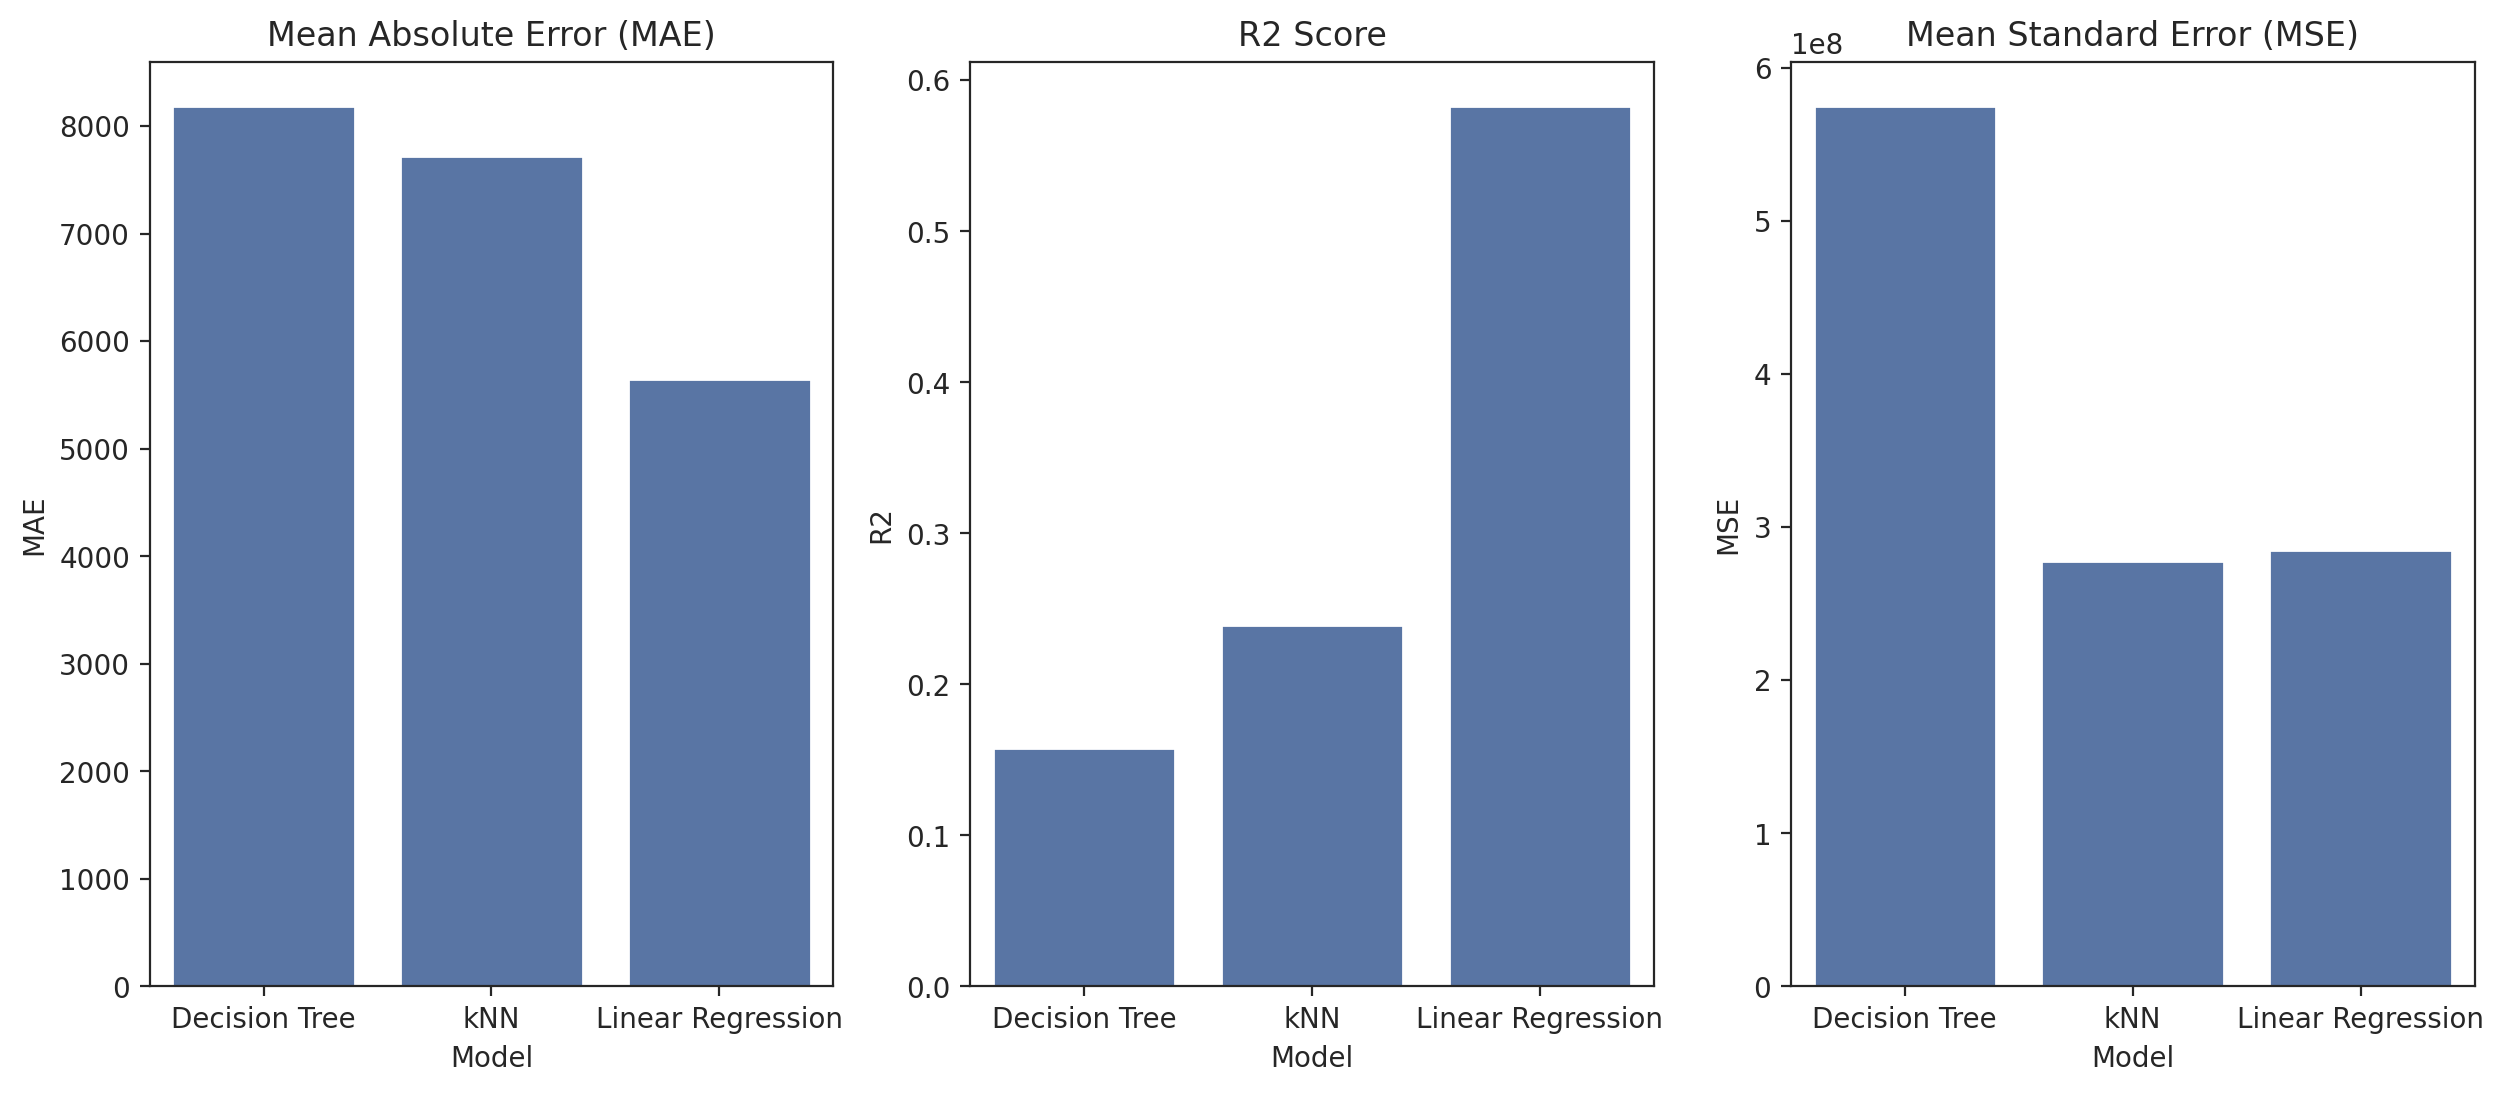

In [ ]:
plt.figure(figsize=(15, 6))
plt.subplot(1,3,1)
sns.barplot(x='Model', y='MAE', data=results)
plt.title('Mean Absolute Error (MAE)')

plt.subplot(1,3,2)
sns.barplot(x='Model', y='R2', data=results)
plt.title('R2 Score')

plt.subplot(1,3,3)
sns.barplot(x='Model', y='MSE', data=results)
plt.title('Mean Standard Error (MSE)')

**Actual vs. Pred**
-  For more understanding I visualized the actual vs the predicted price.

DECISION TREE

Text(0, 0.5, 'Predicted Values')

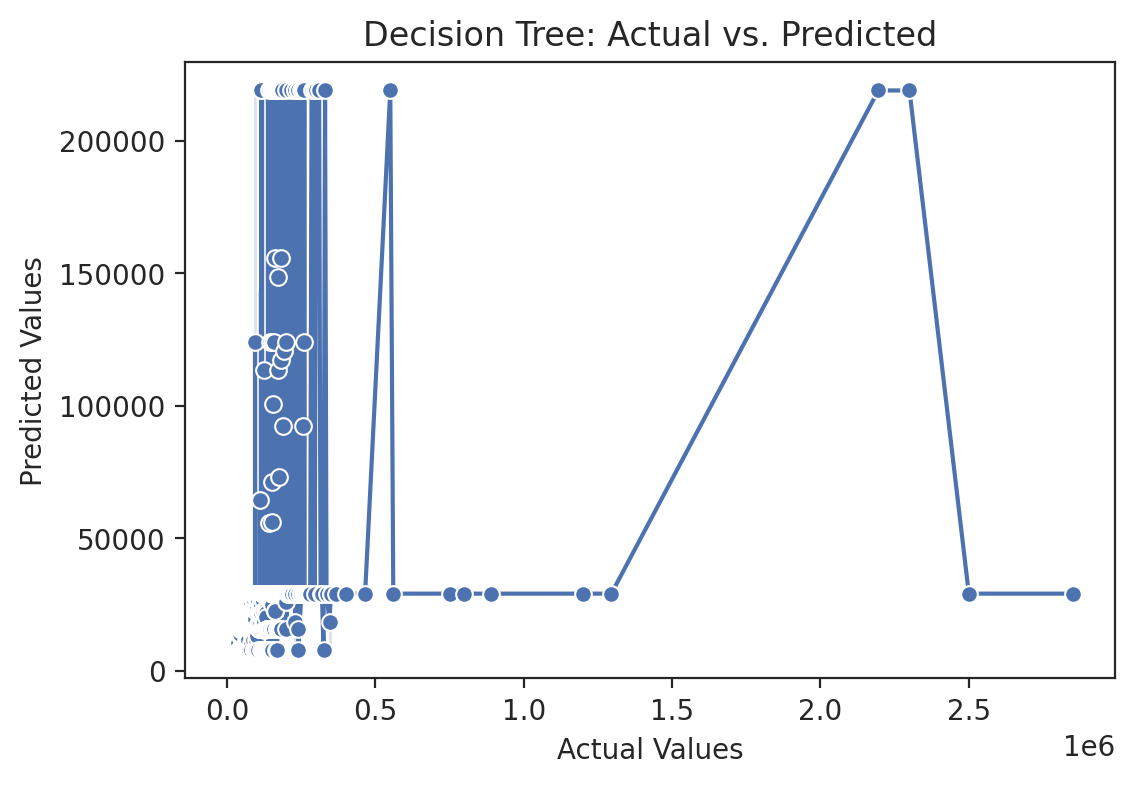

In [ ]:
sns.lineplot(x=y_test, y=dtr_pred, marker='o')
plt.title('Decision Tree: Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

kNN

Text(0, 0.5, 'Predicted Values')

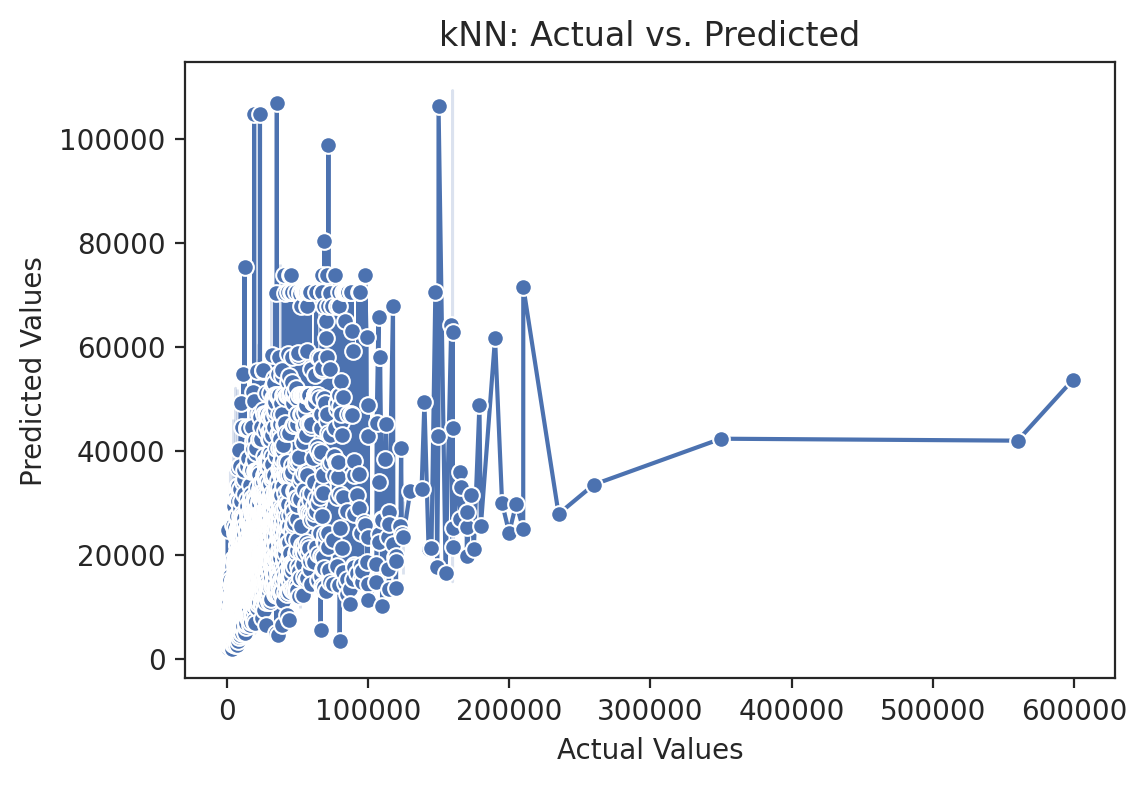

In [ ]:
sns.lineplot(x=y_v_test, y=knnr_pred, marker='o')
plt.title('kNN: Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

Linear Regression

Text(0, 0.5, 'Predicted Values')

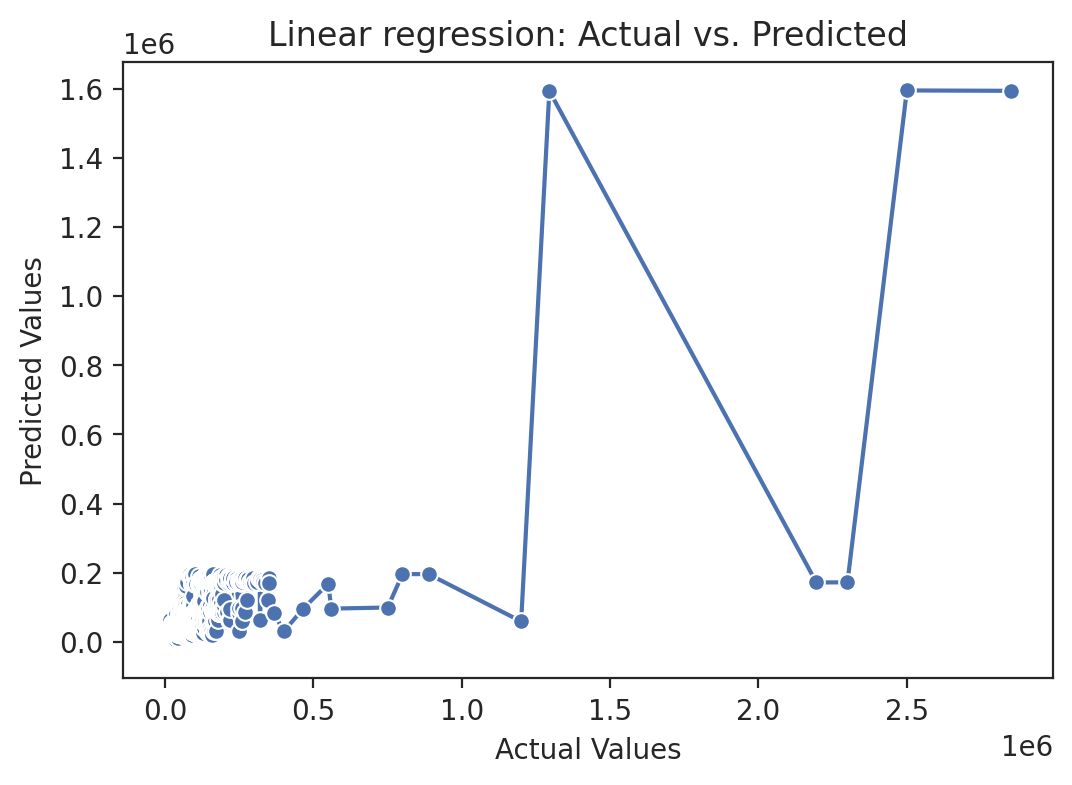

In [ ]:
sns.lineplot(x=y_test, y=lr1d_pred, marker='o')
plt.title('Linear regression: Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

##**Feature Importance**

FOR DECISION TREE
- I am using Dtreeviz model to view important features.

In [ ]:
dtviz = dtreeviz.model(
    dtr, X, y, feature_names=list(X_train.columns))
dtviz.view(scale=1.5, fontname='sans-serif')

FOR LINEAR REGRESSION
- I am using coefficient to determine importance of each features. Larger features equals more coefficient.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110],
 [Text(0, 0, 'mileage'),
  Text(1, 0, 'year_of_registration'),
  Text(2, 0, 'car_year'),
  Text(3, 0, 'body_type_Camper'),
  Text(4, 0, 'body_type_Car Derived Van'),
  Text(5, 0, 'body_type_Chassis Cab'),
  Text(6, 0, 'body_type_Combi Van'),
  Text(7, 0, 'body_type_Convertible'),
  Text(8, 0, 'body_type_Coupe'),
  Text(9, 0, 'body

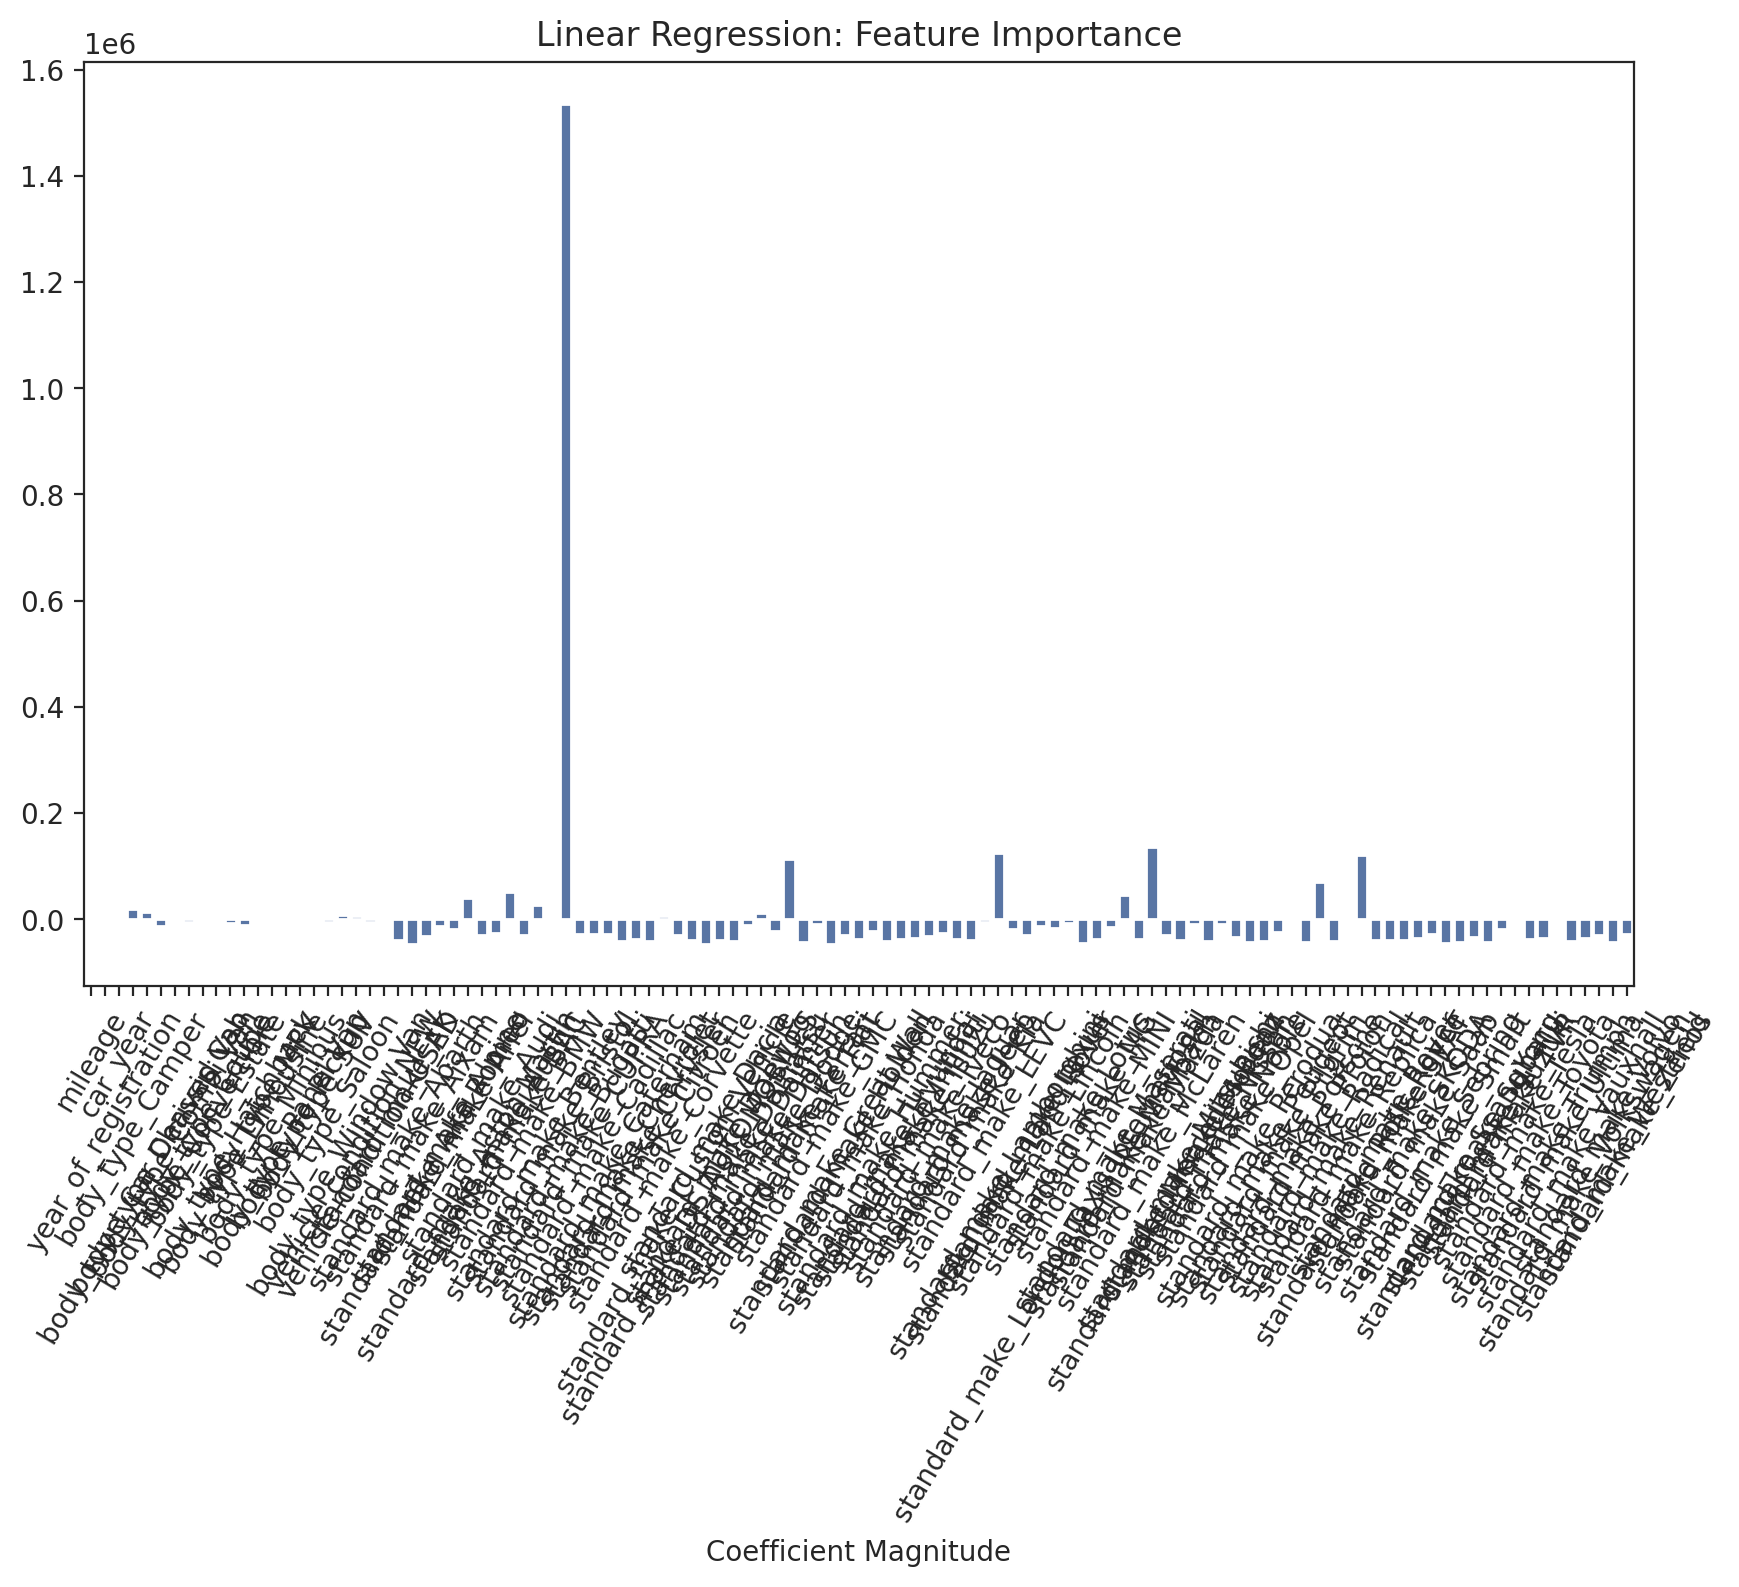

In [ ]:
coeff = lr1d.coef_
feature_names = X_train.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_names, y=coeff)
plt.xlabel('Coefficient Magnitude')
plt.title('Linear Regression: Feature Importance')
plt.xticks(rotation=59)

## **Fine-Grained Evaluation with instance-level errors**

Text(0, 0.5, 'Predicted Prices')

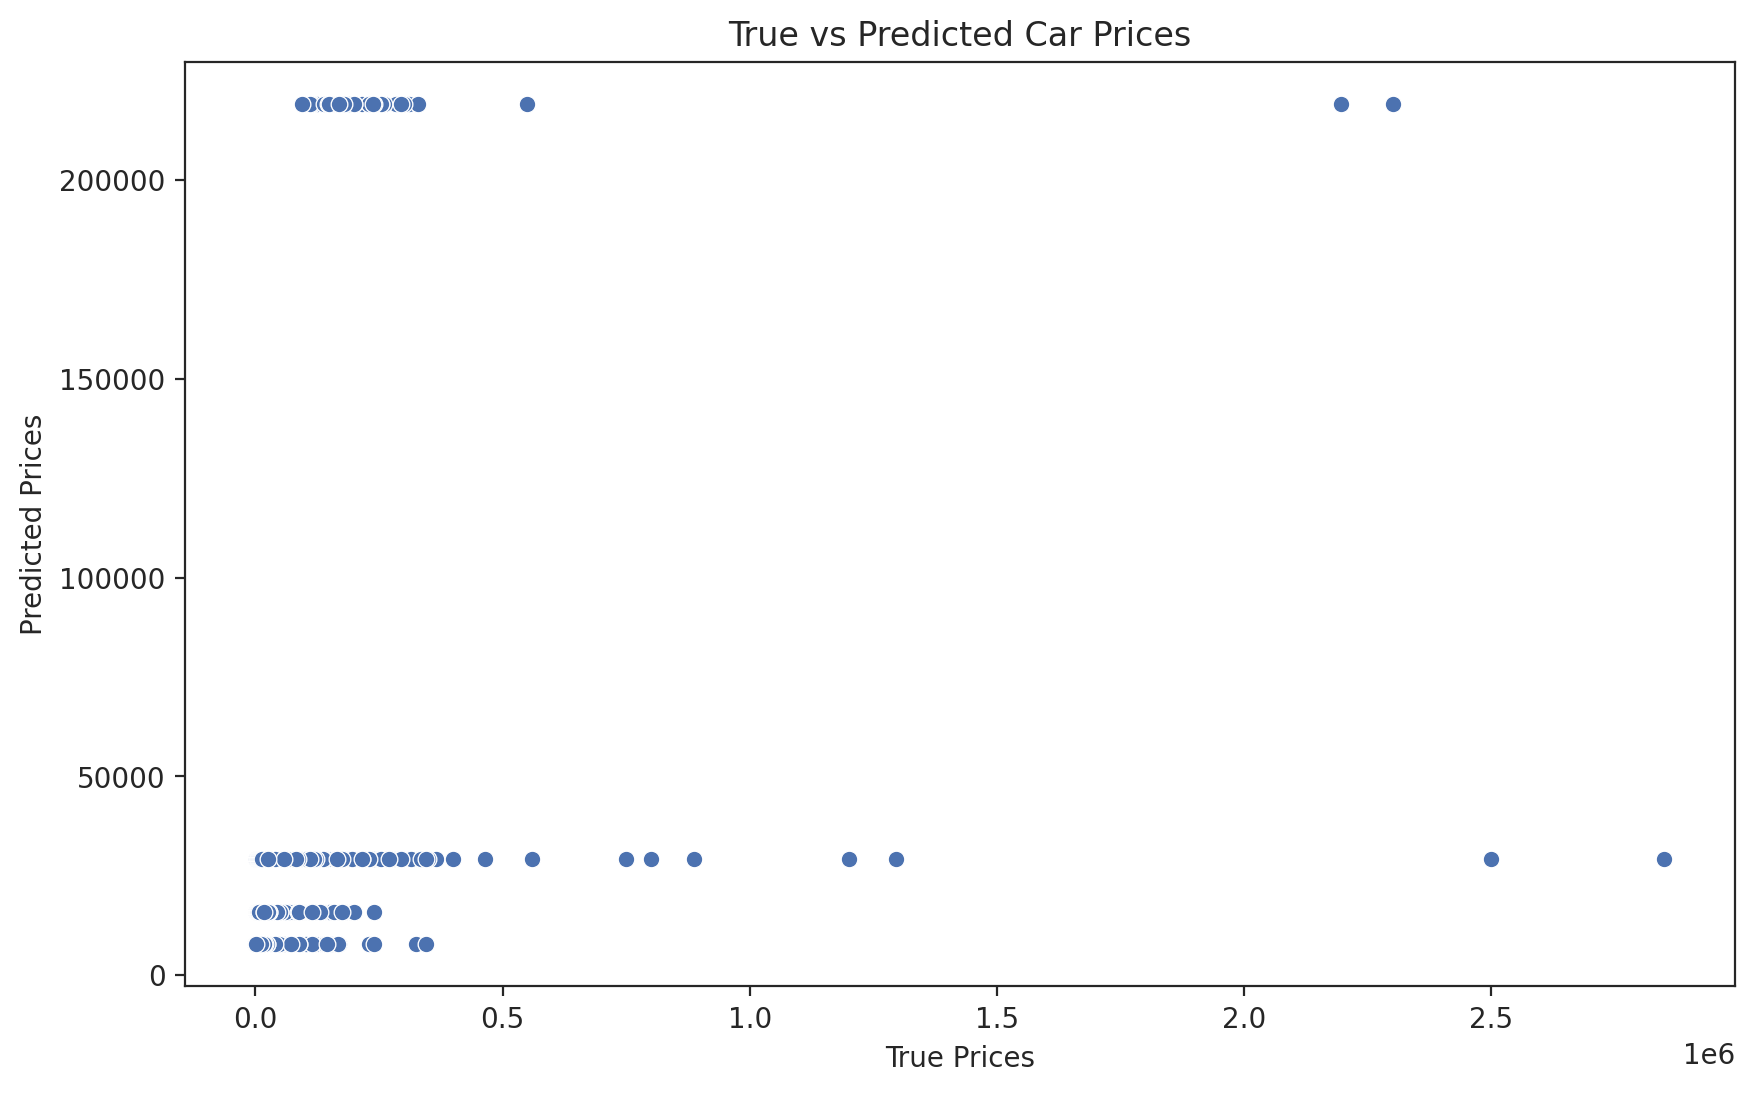

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=dtr_pred)
plt.title('True vs Predicted Car Prices')
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')

Text(0, 0.5, 'Predicted Prices')

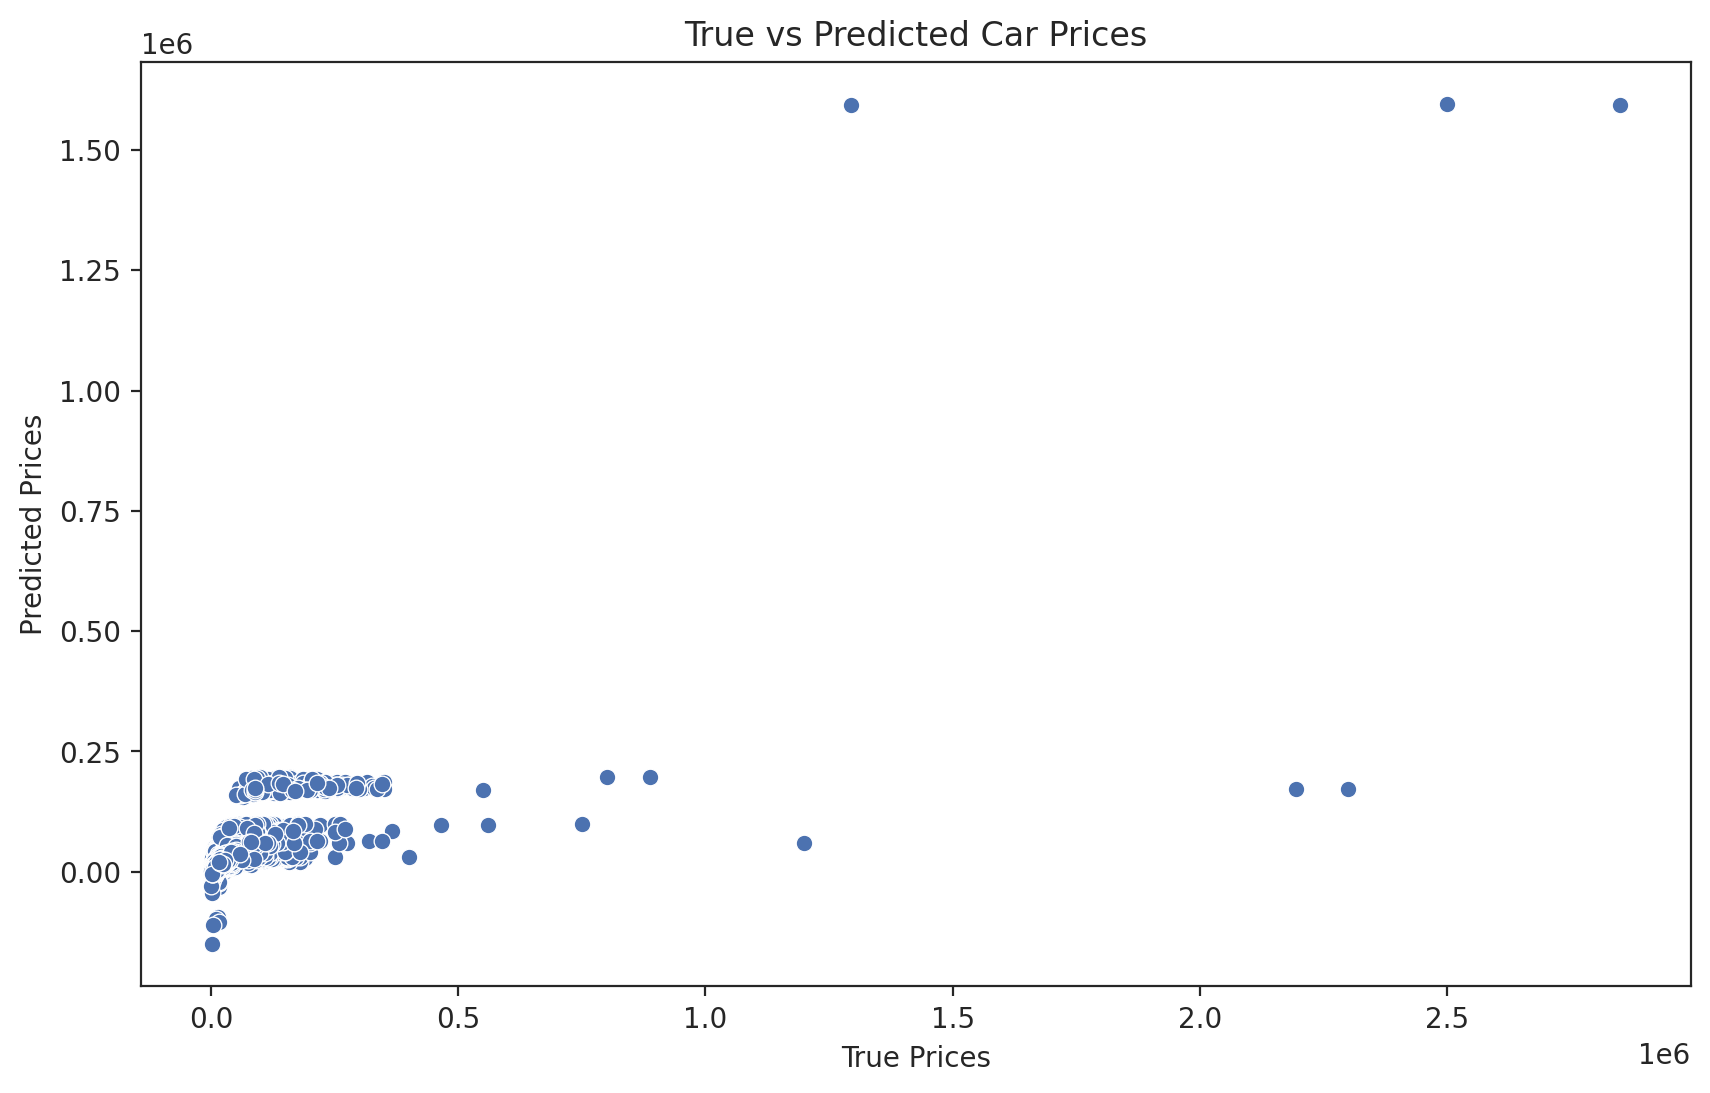

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=lr1d_pred)
plt.title('True vs Predicted Car Prices')
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')